# Weather Classification

The dataset features 5 different classes of weather images. The dataset contains about 1500 labelled images including the validation images. Images are not of fixed dimensions and the photos are of different sizes. Each image has only one weather category and are saved in separate folder as of the labelled class. Each image have been rated for the weather condition on a scale of 0 to 4:

0 - Cloudy
1 - foggy
2 - rainy
3 - Shine
4 - Sunrise.


**Importing Library**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
# plt.style.use("dark_background")

In [2]:
import os
os.listdir('./dataset')

['alien_test', 'cloudy', 'foggy', 'rainy', 'shine', 'sunrise', 'test.csv']

**Loading Images**

In [3]:
from PIL import Image

def load_images(path):
    imgs = list()
    label = list()
    
    for folder in os.listdir(path):
        if folder not in ['alien_test', 'test.csv']:
            subpath = path + '/' + folder
            for image in os.listdir(subpath):
                img = Image.open(subpath + '/' + image).convert('RGB')
                img = img.resize(size=(32, 32))
                imgs.append(np.array(img))
                label.append(folder)
                del img
    
    plt.figure(figsize = (5, 5))
    for i in range(20):
        plt.subplot(5, 4, i+1)
        plt.imshow(imgs[i], cmap="gray")
        plt.axis('off')
    plt.show()
    return np.array(imgs), label

# Dataset Pre-Processing

**Fetching Images & Applying Normalization on Images**

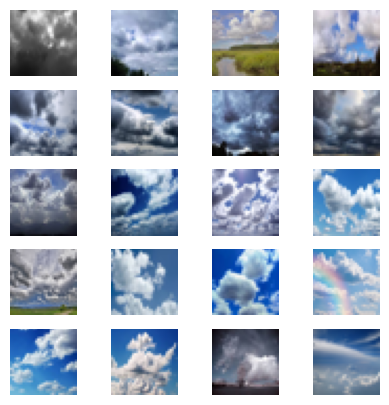

((1500, 32, 32, 3), 1500)

In [4]:
x, y = load_images('./dataset')
x = x/255.0
x.shape, len(y)

**Reshaping all the images**

In [5]:
nsamples, nx, ny, nrgb = x.shape
x_new = x.reshape((nsamples, nx * ny * nrgb))
x_new.shape

(1500, 3072)

**Applying Label Encoding**

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_new = label_encoder.fit_transform(y)
x_new.shape, y_new.shape

((1500, 3072), (1500,))

**Split Dataset into training & testing data**

In [7]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x_new, y_new, test_size=0.01, random_state=42)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((1485, 3072), (15, 3072), (1485,), (15,))

**plot sample data**

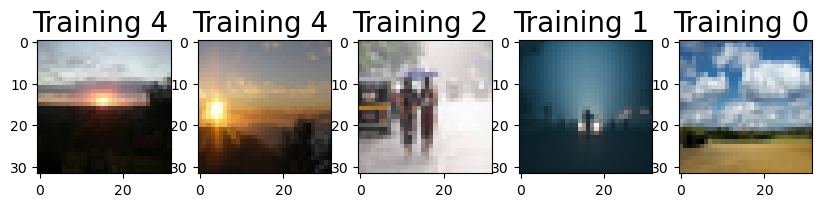

In [8]:
plt.figure(figsize = (10, 10))
for index, (image, label) in enumerate(zip(train_x[:5], train_y[:5])):
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image, (32, 32, 3)))
    plt.title('Training %d ' % label, fontsize=20)

# Plotting function

In [9]:
# Confusion Matrix
def plotConfusionMatrix(actual, predict, model):
    from sklearn.metrics import confusion_matrix
    
    labels = ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']
    
    confusion_matrix = confusion_matrix(actual, predict)
    matrix_df = pd.DataFrame(confusion_matrix)  #plot the result
    
    ax = plt.axes()
    sns.set(font_scale=1)
    plt.figure(figsize=(15, 15))
    sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="Oranges") # set axis titles

    ax.set_title(f'Confusion Matrix - {model}\n', fontsize=15)
    ax.set_xlabel('\nPredicted label', fontsize=15)
    ax.set_ylabel('True Label\n', fontsize=15)
    ax.set_yticklabels(list(labels), rotation=0)
    plt.show()

In [10]:
# Plot Prediction
def plotPrediction(x, y, prediction):
    plt.figure(figsize=(15, 15))
    for index, (image, actual, pred) in enumerate(zip(x, y, prediction)):
        plt.subplot(3, 5, index+1)
        plt.imshow(np.reshape(image, (32, 32, 3)))
        plt.title(f'{actual} -> {pred} ', fontsize=15)
    plt.show()

# Logistic Regression

**solver{‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’}, default='lbfgs'**

In [11]:
from sklearn.linear_model import LogisticRegression

**solver = "newton-cg"**

In [12]:
lgr_newton = LogisticRegression(solver="newton-cg")
lgr_newton.fit(train_x, train_y)
lgr_newton_pred = lgr_newton.predict(test_x)
print("Actual  -", test_y)
print("Predict -", lgr_newton_pred)
print("Accuracy-", lgr_newton.score(test_x, test_y))

Actual  - [3 4 1 1 1 2 3 2 4 0 2 4 2 4 0]
Predict - [3 4 1 1 1 0 3 1 4 0 0 4 0 4 0]
Accuracy- 0.7333333333333333


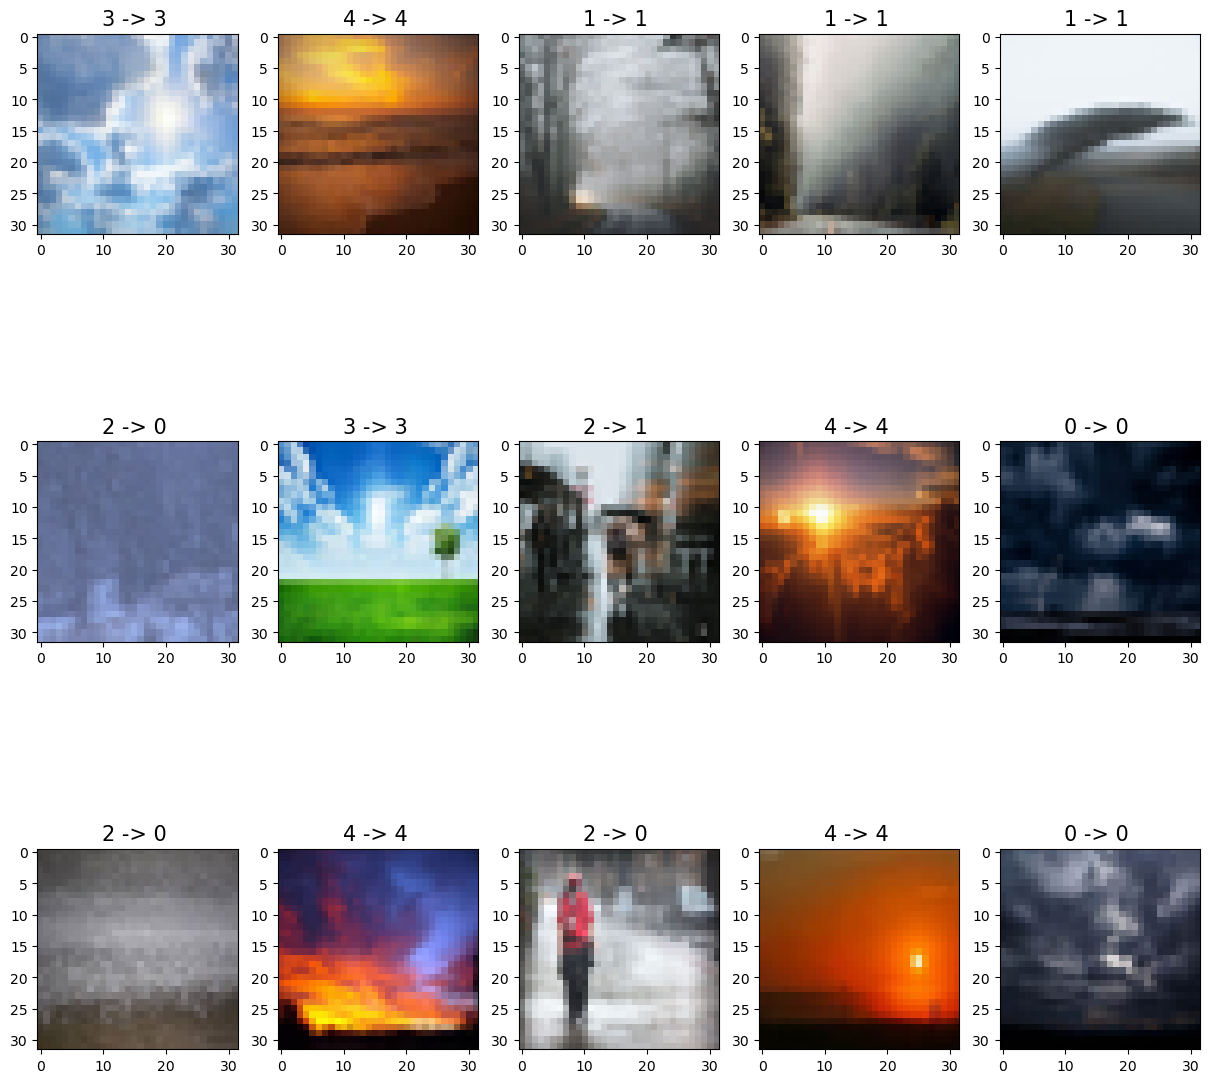

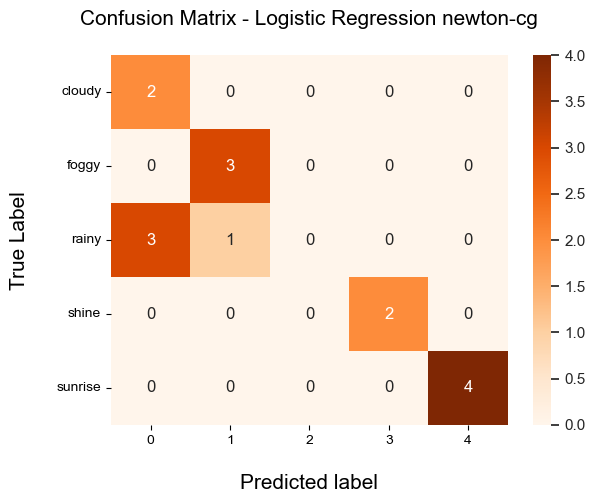

<Figure size 1500x1500 with 0 Axes>

In [13]:
plotPrediction(test_x, test_y, lgr_newton_pred)
plotConfusionMatrix(test_y, lgr_newton_pred, 'Logistic Regression newton-cg')

**solver = "lbfgs"**

In [14]:
lgr_lbfgs = LogisticRegression(solver="lbfgs")
lgr_lbfgs.fit(train_x, train_y)
lgr_lbfgs_pred = lgr_lbfgs.predict(test_x)
print("Actual  -", test_y)
print("Predict -", lgr_lbfgs_pred)
print("Accuracy-", lgr_lbfgs.score(test_x, test_y))

Actual  - [3 4 1 1 1 2 3 2 4 0 2 4 2 4 0]
Predict - [3 4 2 1 1 2 3 1 4 0 0 4 2 4 0]
Accuracy- 0.8


c:\Users\shiva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


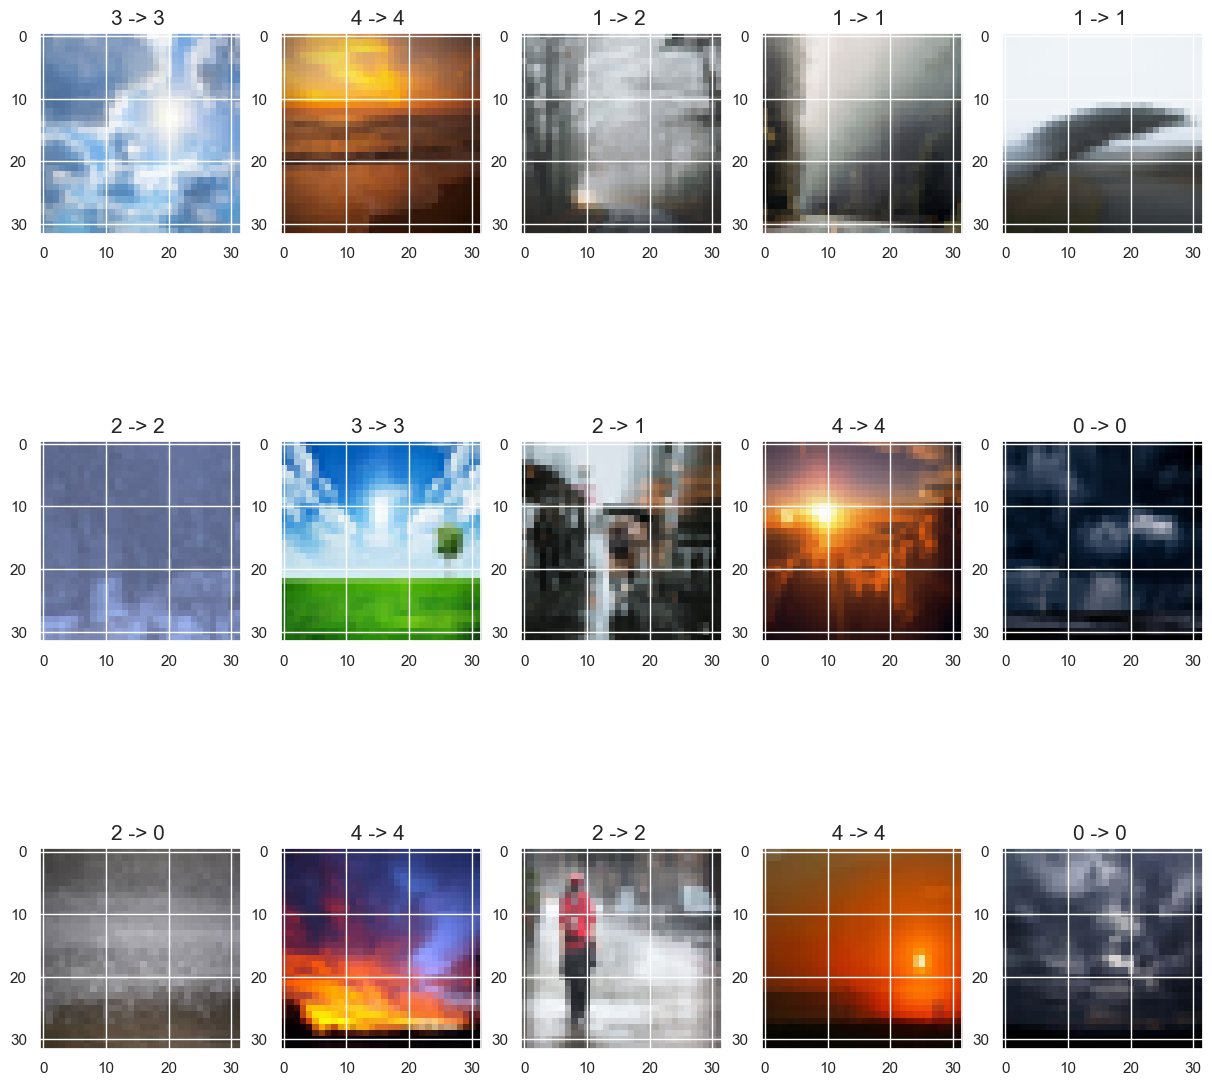

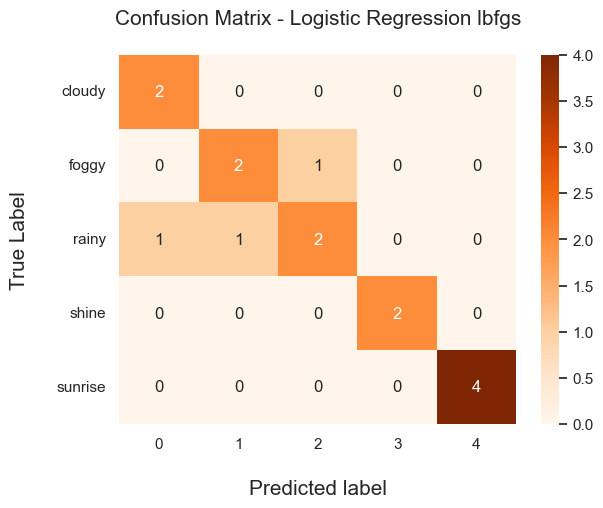

<Figure size 1500x1500 with 0 Axes>

In [15]:
plotPrediction(test_x, test_y, lgr_lbfgs_pred)
plotConfusionMatrix(test_y, lgr_lbfgs_pred, 'Logistic Regression lbfgs')

**solver = "liblinear"**

In [16]:
lgr_liblinear = LogisticRegression(solver="liblinear")
lgr_liblinear.fit(train_x, train_y)
lgr_liblinear_pred = lgr_liblinear.predict(test_x)
print("Actual Result -", test_y)
print("Predicted Result -", lgr_liblinear_pred)
print("Accuracy -", lgr_liblinear.score(test_x, test_y))

Actual Result - [3 4 1 1 1 2 3 2 4 0 2 4 2 4 0]
Predicted Result - [3 4 2 1 1 2 3 1 4 0 0 4 0 4 0]
Accuracy - 0.7333333333333333


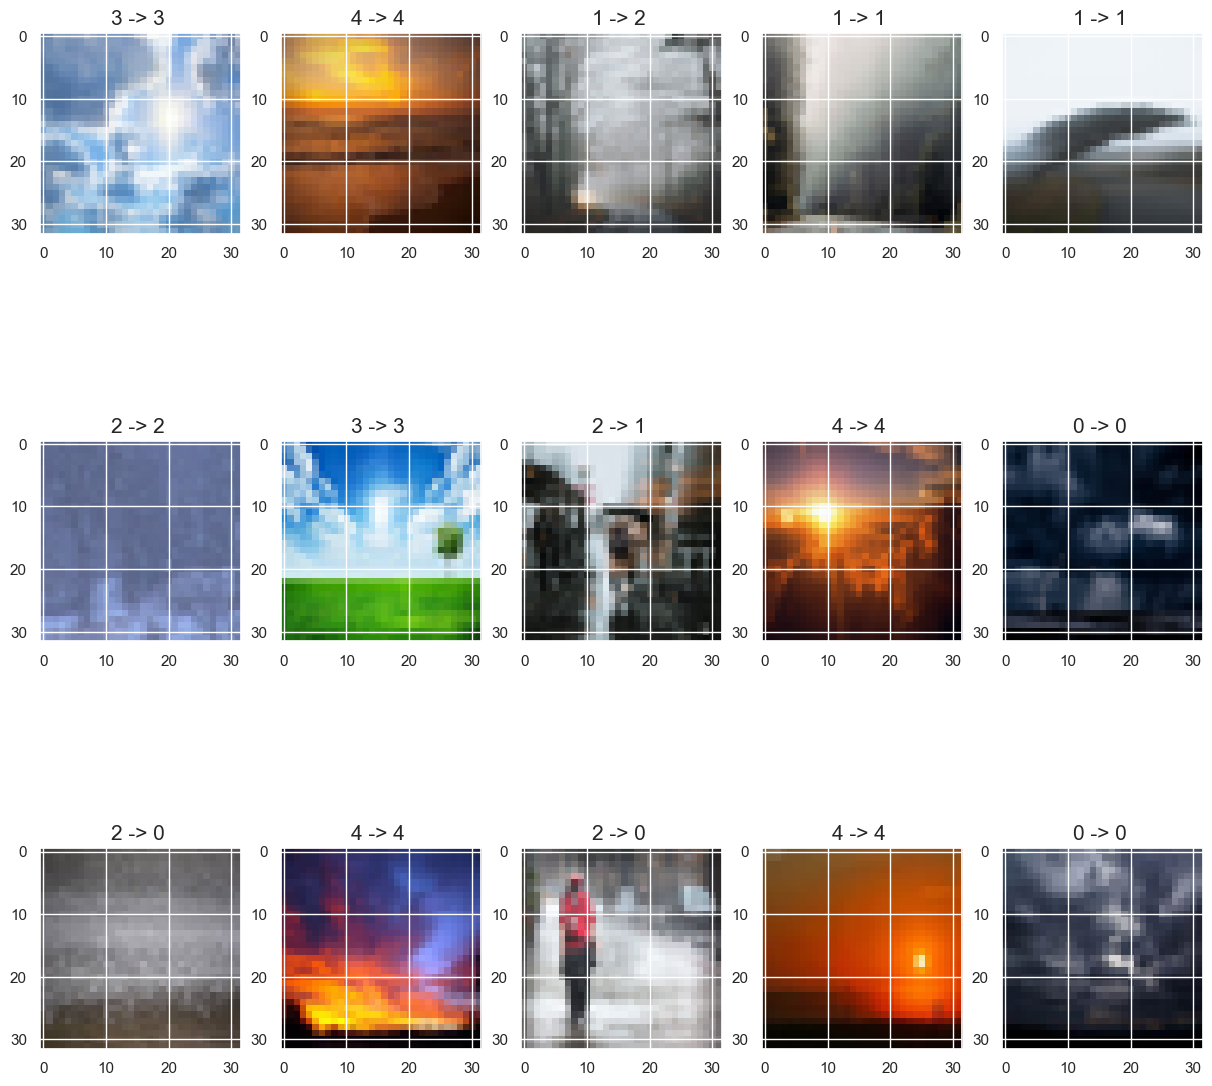

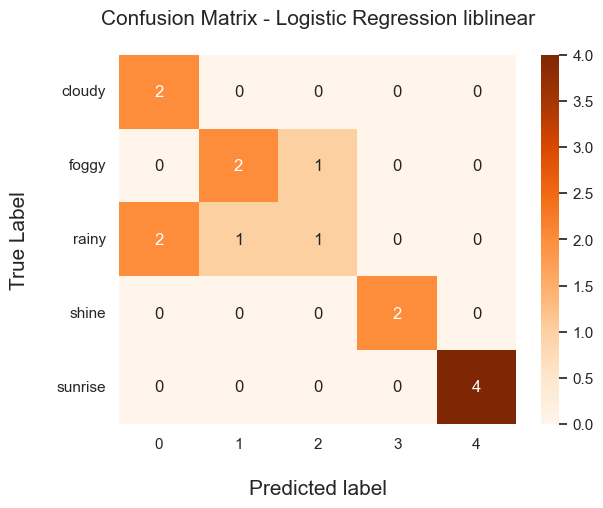

<Figure size 1500x1500 with 0 Axes>

In [17]:
plotPrediction(test_x, test_y, lgr_liblinear_pred)
plotConfusionMatrix(test_y, lgr_liblinear_pred, 'Logistic Regression liblinear')

**solver = "sag"**

In [18]:
lgr_sag = LogisticRegression(solver="sag")
lgr_sag.fit(train_x, train_y)
lgr_sag_pred = lgr_sag.predict(test_x)
print("Actual Result -", test_y)
print("Predicted Result -", lgr_sag_pred)
print("Accuracy -", lgr_sag.score(test_x, test_y))

Actual Result - [3 4 1 1 1 2 3 2 4 0 2 4 2 4 0]
Predicted Result - [3 4 1 1 1 2 3 1 4 0 0 4 2 4 0]
Accuracy - 0.8666666666666667


c:\Users\shiva\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


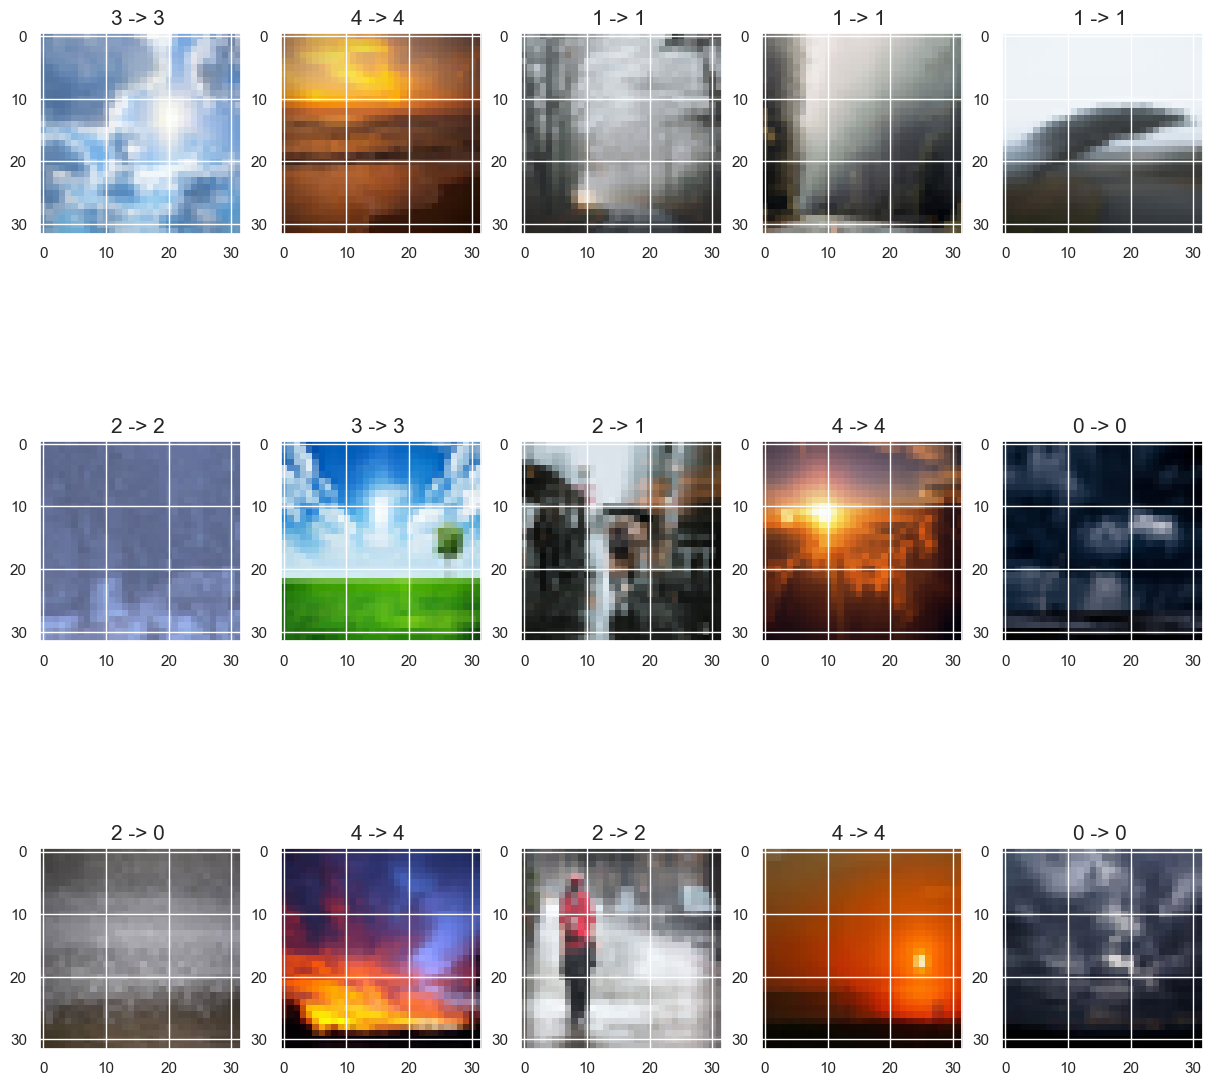

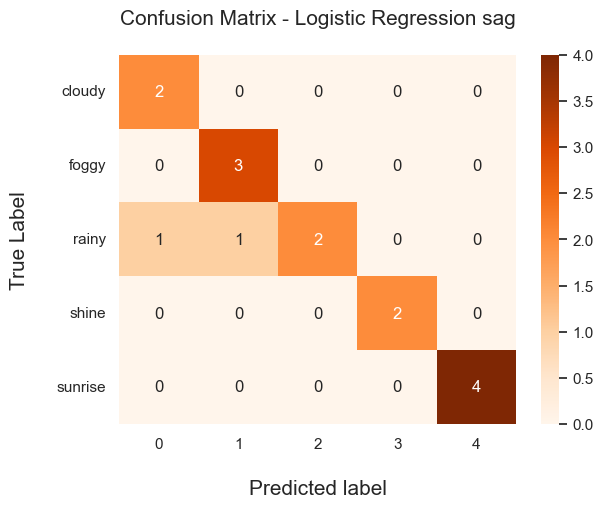

<Figure size 1500x1500 with 0 Axes>

In [19]:
plotPrediction(test_x, test_y, lgr_sag_pred)
plotConfusionMatrix(test_y, lgr_sag_pred, 'Logistic Regression sag')

**solver = "saga"**

In [20]:
lgr_saga = LogisticRegression(solver="saga")
lgr_saga.fit(train_x, train_y)
lgr_saga_pred = lgr_saga.predict(test_x)
print("Actual Result -", test_y)
print("Predicted Result -", lgr_saga_pred)
print("Accuracy -", lgr_saga.score(test_x, test_y))

Actual Result - [3 4 1 1 1 2 3 2 4 0 2 4 2 4 0]
Predicted Result - [3 4 1 1 1 2 3 1 4 0 0 4 2 4 0]
Accuracy - 0.8666666666666667


c:\Users\shiva\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


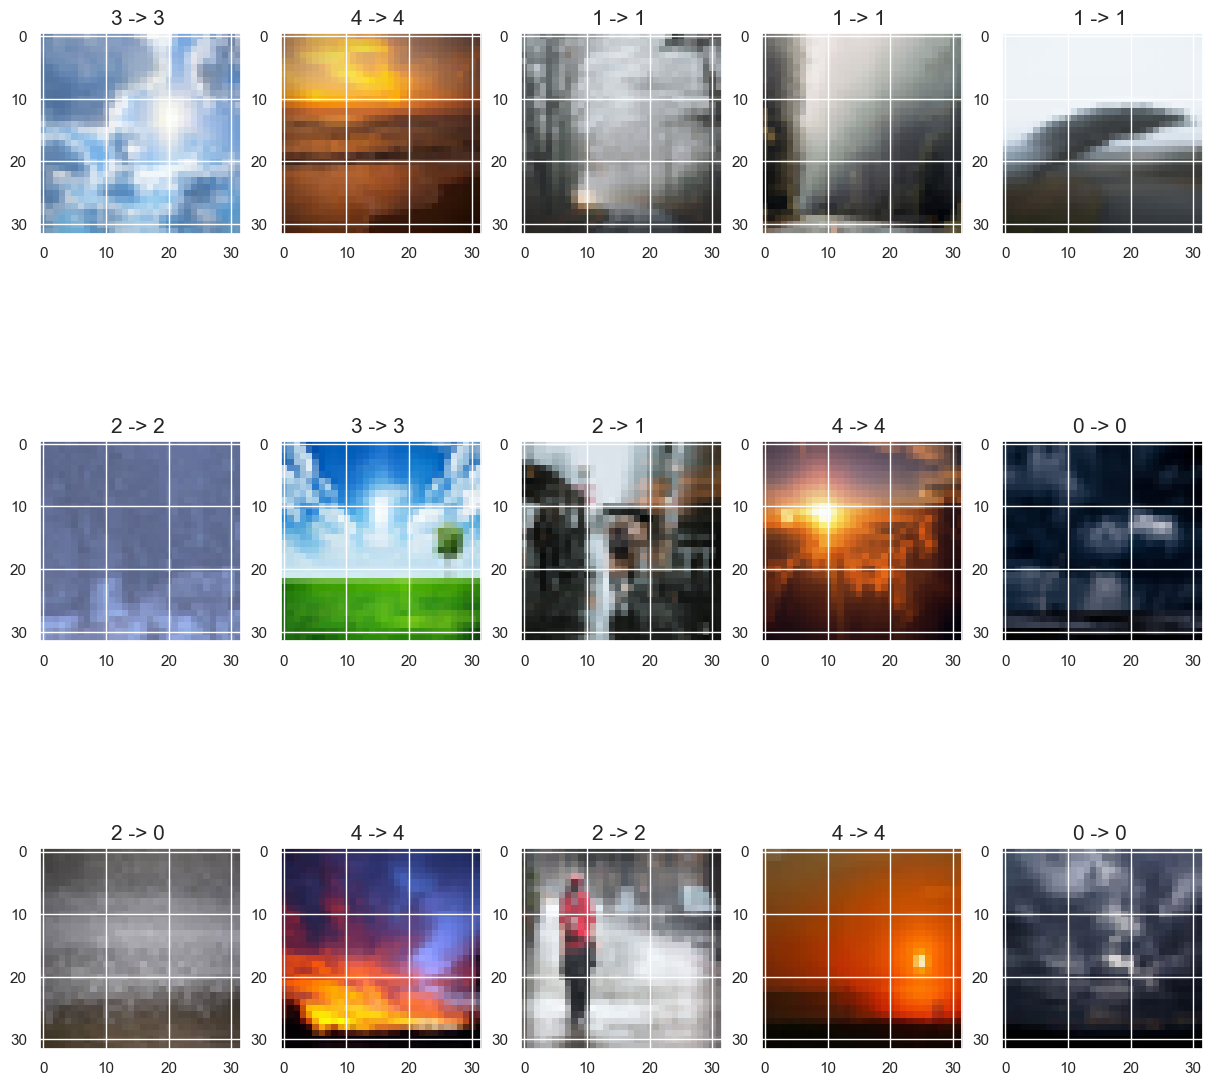

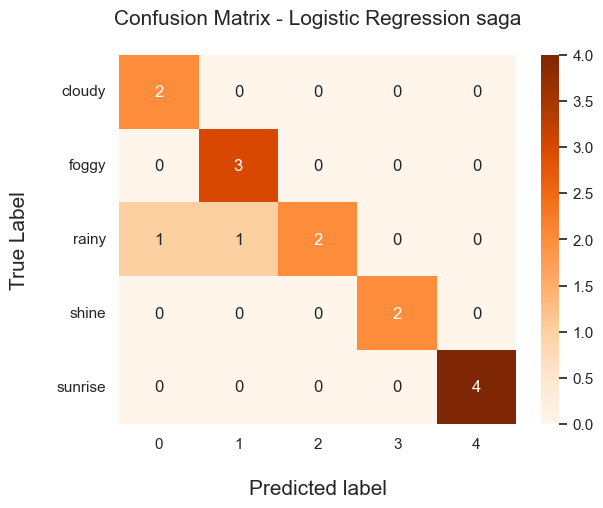

<Figure size 1500x1500 with 0 Axes>

In [21]:
plotPrediction(test_x, test_y, lgr_saga_pred)
plotConfusionMatrix(test_y, lgr_saga_pred, 'Logistic Regression saga')

In [22]:
from sklearn.model_selection import GridSearchCV

params = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'multi_class': ['auto', 'ovr', 'multinomial']
}

lgr = GridSearchCV(LogisticRegression(), params)
lgr.fit(train_x, train_y)
lgr_pred = lgr.predict(test_x)

c:\Users\shiva\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shiva\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shiva\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shiva\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shiva\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shiva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs fa

In [23]:
print("Actual-", test_y)
print("Predicted-", lgr_pred)
print(lgr.score(test_x, test_y))

Actual- [3 4 1 1 1 2 3 2 4 0 2 4 2 4 0]
Predicted- [3 4 2 1 1 2 3 1 4 0 0 4 2 4 0]
0.8


In [24]:
lgr.best_params_

{'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}

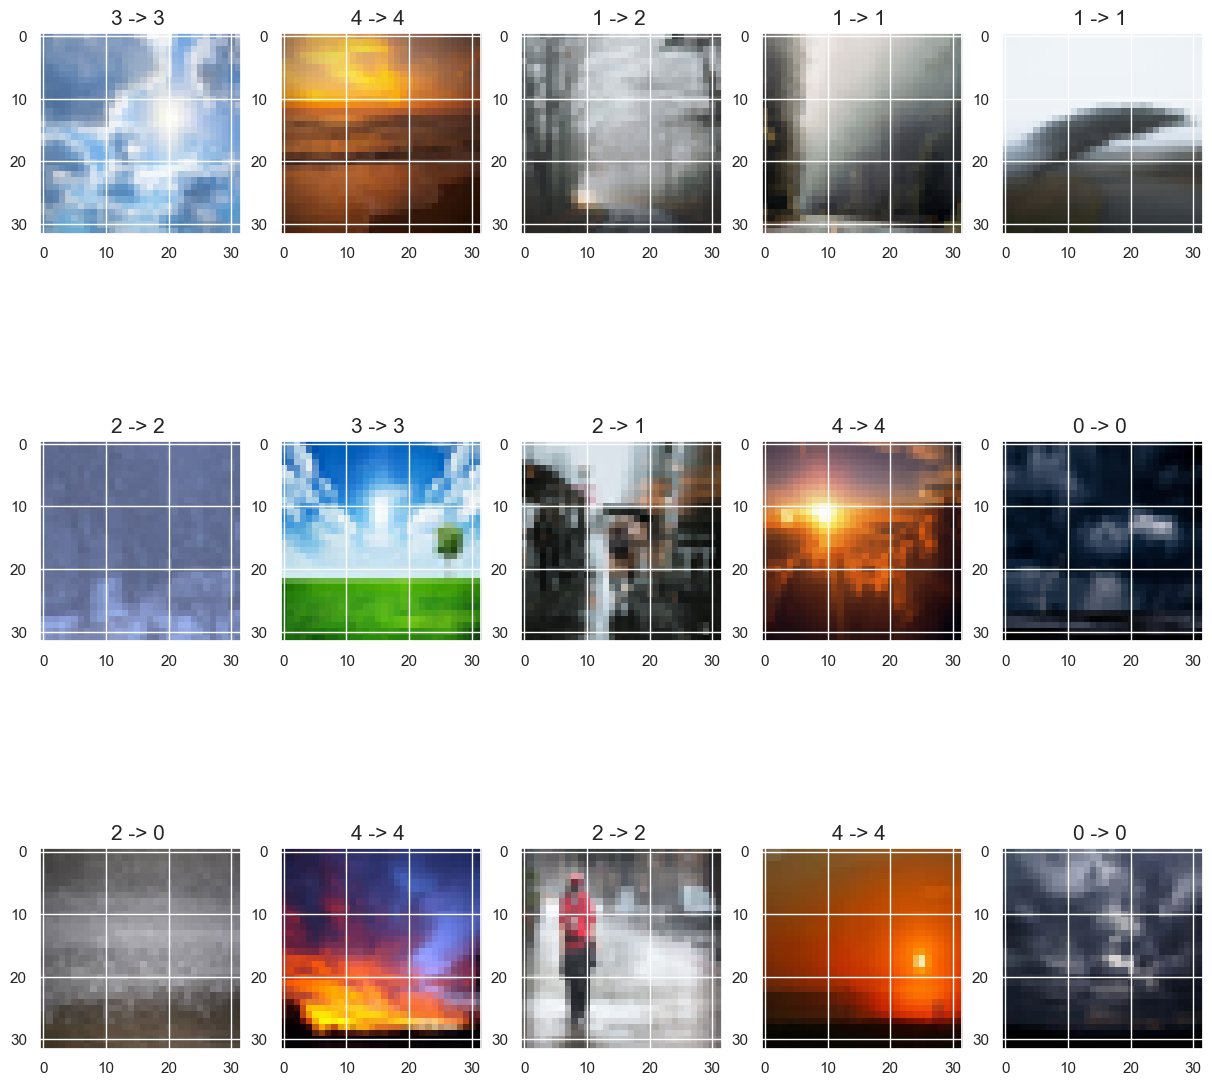

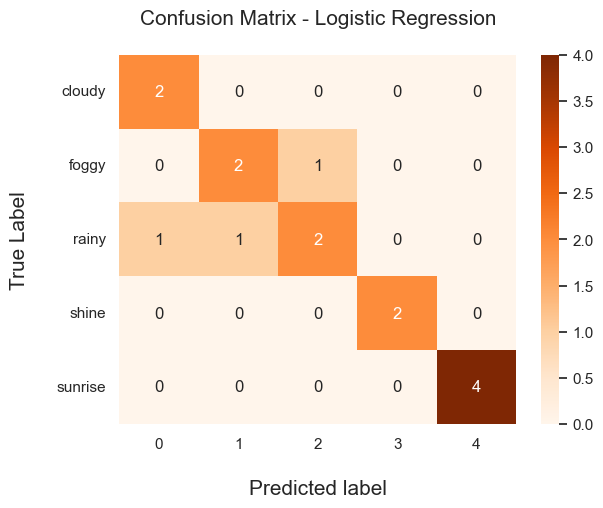

<Figure size 1500x1500 with 0 Axes>

In [25]:
plotPrediction(test_x, test_y, lgr_pred)
plotConfusionMatrix(test_y, lgr_pred, 'Logistic Regression')

# Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dtc = DecisionTreeClassifier()
dtc.fit(train_x, train_y)
dtc_pred = dtc.predict(test_x)
print("Actual Result -", test_y)
print("Predicted Result -", dtc_pred)
print("Accuracy -", dtc.score(test_x, test_y))

Actual Result - [3 4 1 1 1 2 3 2 4 0 2 4 2 4 0]
Predicted Result - [0 4 1 0 2 2 3 1 4 2 2 4 1 4 4]
Accuracy - 0.5333333333333333


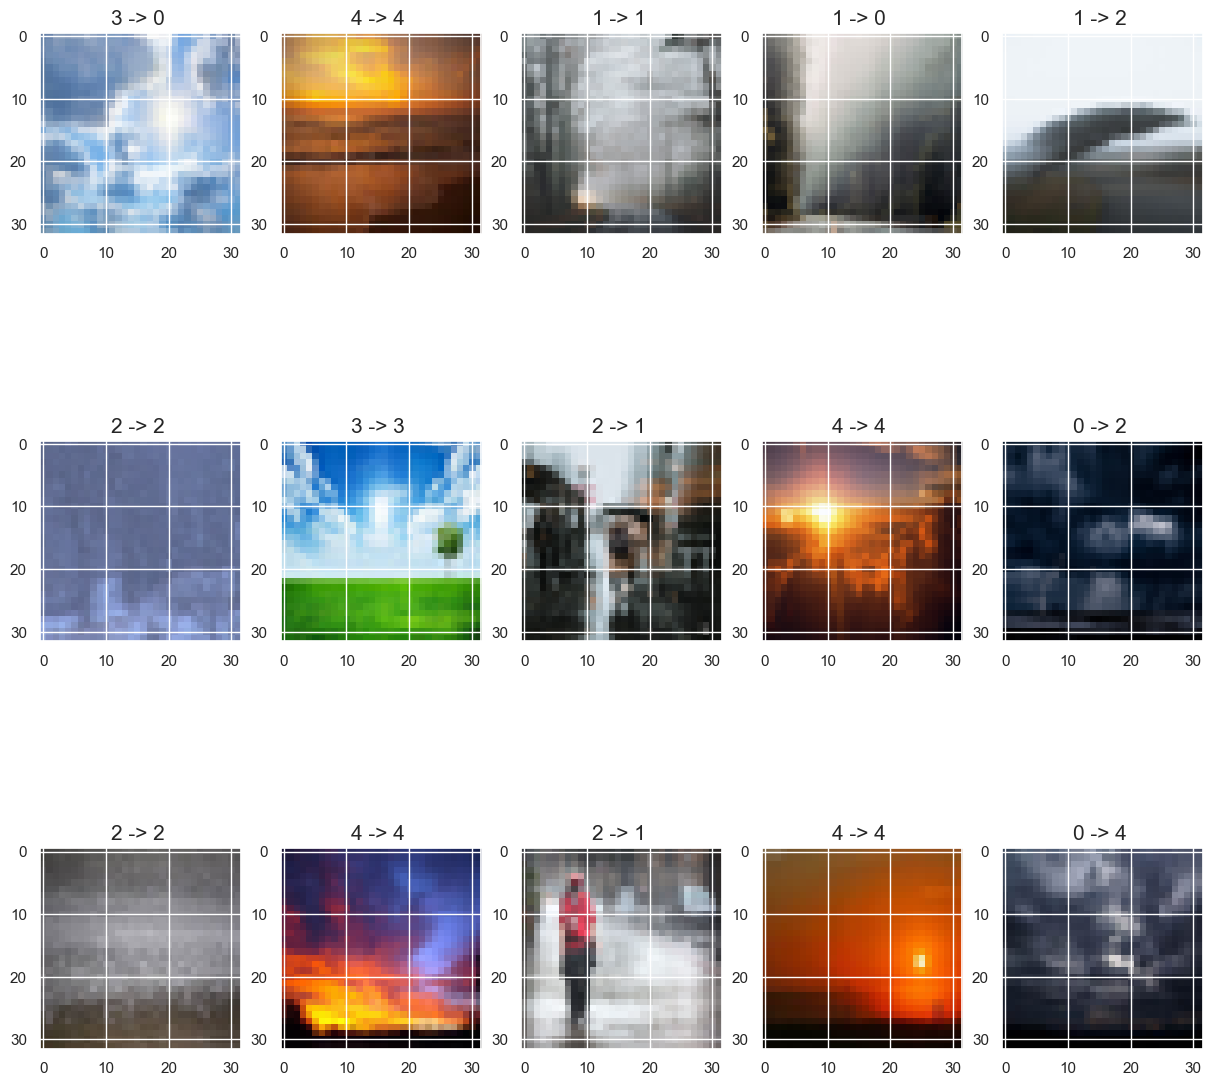

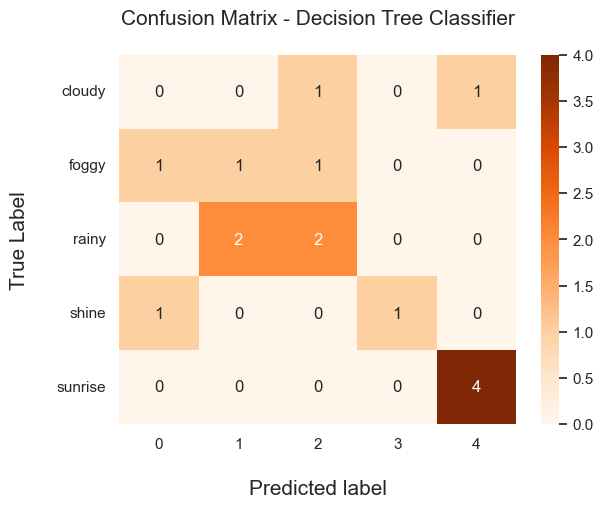

<Figure size 1500x1500 with 0 Axes>

In [28]:
plotPrediction(test_x, test_y, dtc_pred)
plotConfusionMatrix(test_y, dtc_pred, 'Decision Tree Classifier')

# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rfc = RandomForestClassifier()
rfc.fit(train_x, train_y)
rfc_pred = rfc.predict(test_x)
print("Actual Result -", test_y)
print("Predicted Result -", rfc_pred)
print("Accuracy -", rfc.score(test_x, test_y))

Actual Result - [3 4 1 1 1 2 3 2 4 0 2 4 2 4 0]
Predicted Result - [3 4 1 1 1 2 3 1 4 1 2 4 2 4 0]
Accuracy - 0.8666666666666667


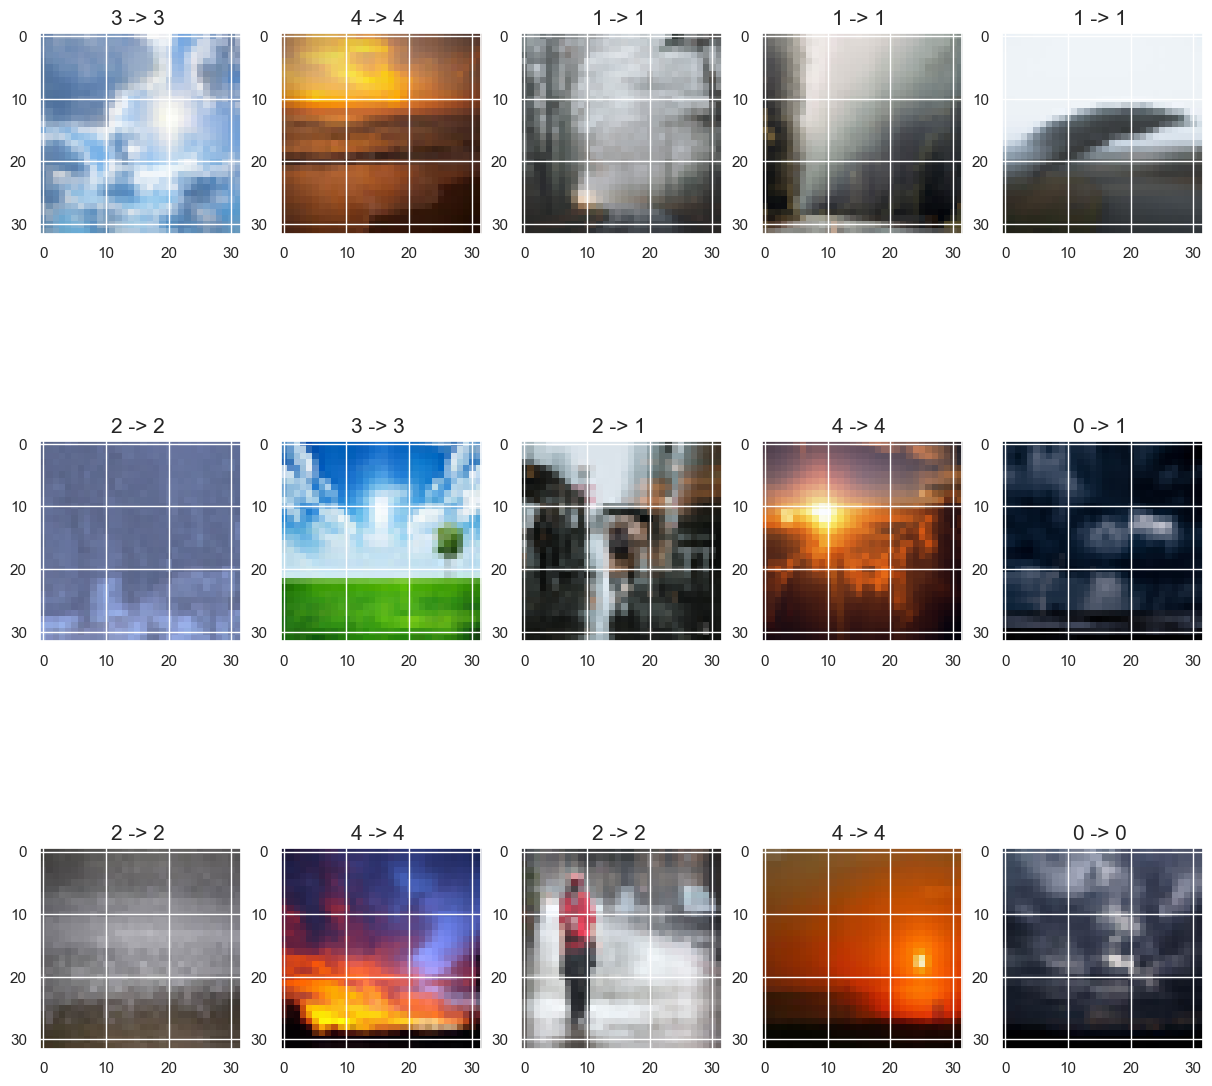

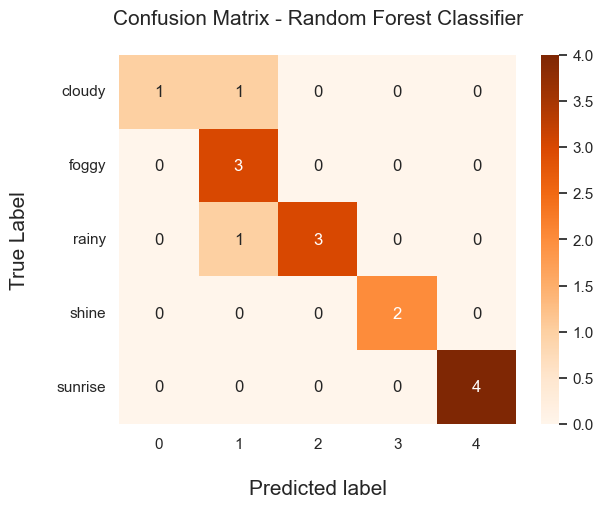

<Figure size 1500x1500 with 0 Axes>

In [31]:
plotPrediction(test_x, test_y, rfc_pred)
plotConfusionMatrix(test_y, rfc_pred, 'Random Forest Classifier')

# ADA Boost Classifier

In [32]:
from sklearn.ensemble import AdaBoostClassifier

In [33]:
ada_boost = AdaBoostClassifier(algorithm='SAMME')
ada_boost.fit(train_x, train_y)
ada_boost_pred = ada_boost.predict(test_x)
print("Actual-", test_y)
print("Predicted-", ada_boost_pred)
print("Accuracy -", ada_boost.score(test_x, test_y))

Actual- [3 4 1 1 1 2 3 2 4 0 2 4 2 4 0]
Predicted- [3 4 1 1 1 0 3 1 4 4 0 4 2 4 0]
Accuracy - 0.7333333333333333


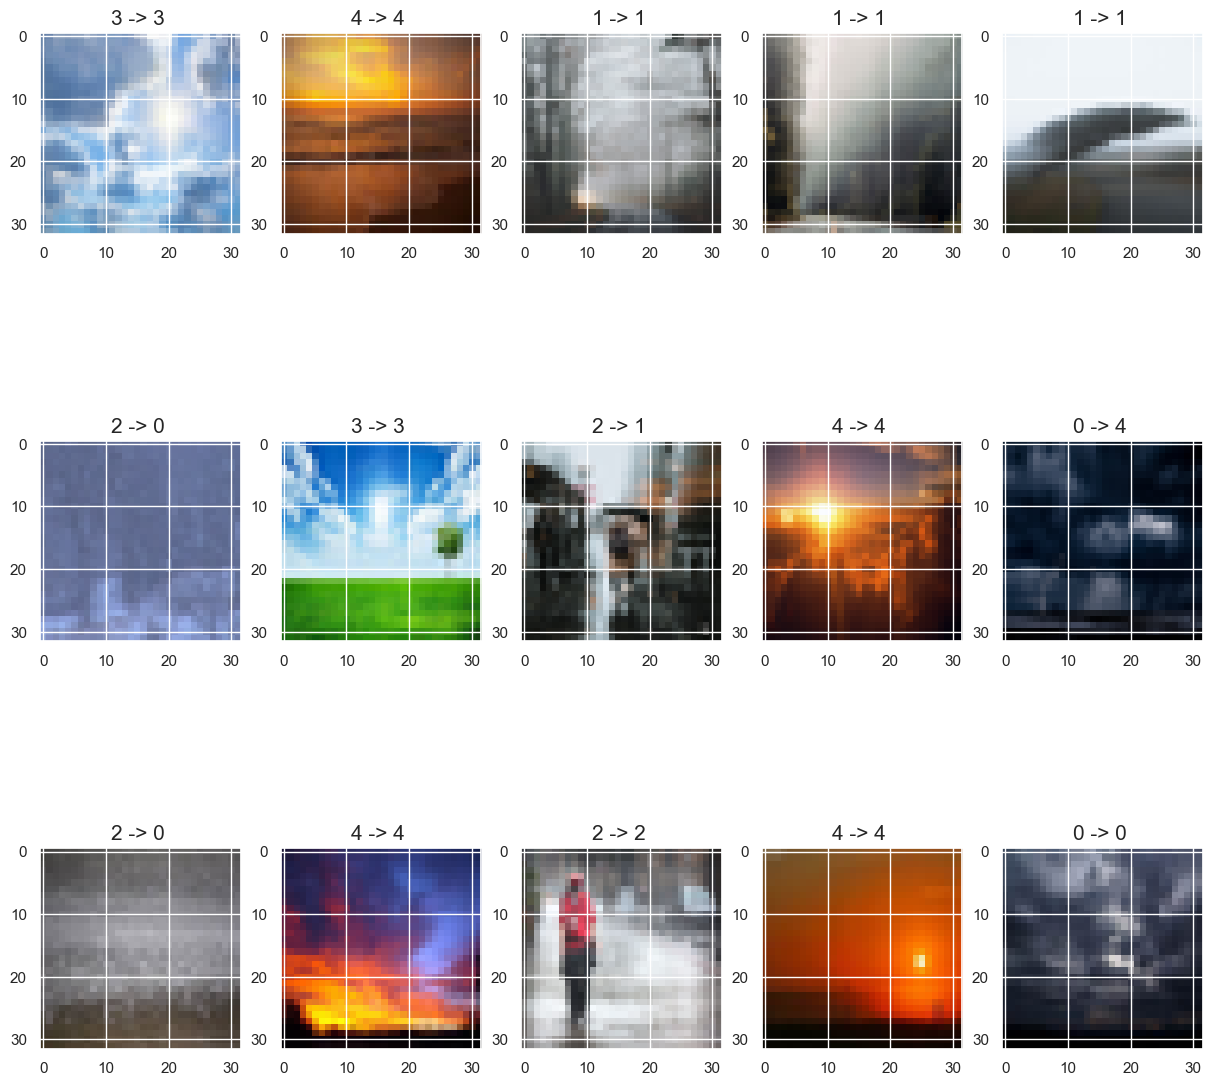

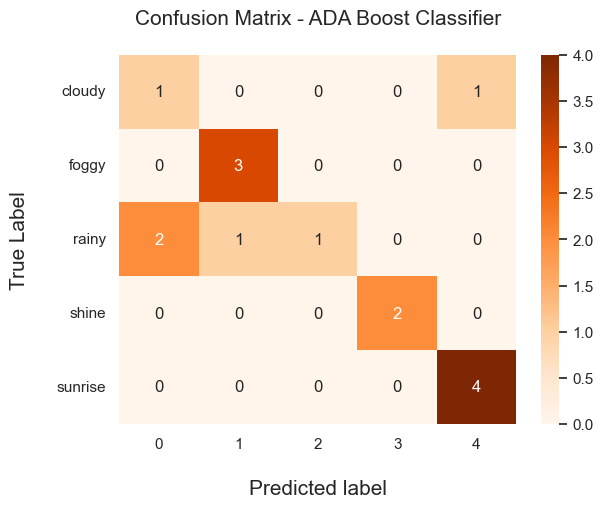

<Figure size 1500x1500 with 0 Axes>

In [34]:
plotPrediction(test_x, test_y, ada_boost_pred)
plotConfusionMatrix(test_y, ada_boost_pred, 'ADA Boost Classifier')

# XGBoost

In [35]:
from xgboost import XGBClassifier

c:\Users\shiva\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [36]:
xbgc = XGBClassifier()
xbgc.fit(train_x, train_y)
xbgc_pred = xbgc.predict(test_x)
print("Actual Result -", test_y)
print("Predicted Result -", xbgc_pred)
print("Accuracy -", xbgc.score(test_x, test_y))

c:\Users\shiva\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:51:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Actual Result - [3 4 1 1 1 2 3 2 4 0 2 4 2 4 0]
Predicted Result - [3 4 1 2 1 0 3 2 4 1 2 4 2 4 0]
Accuracy - 0.8


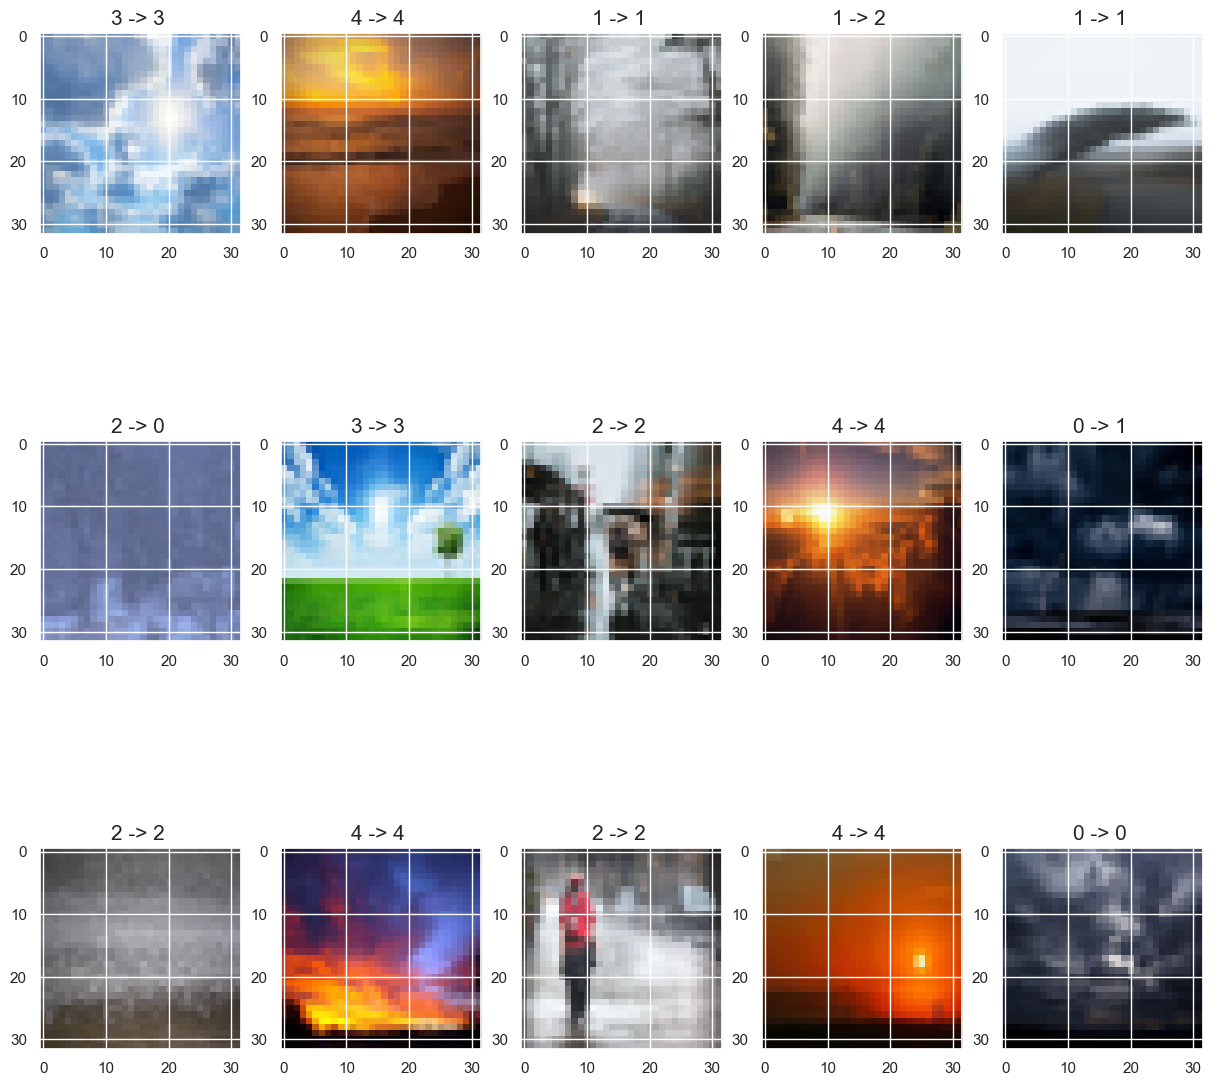

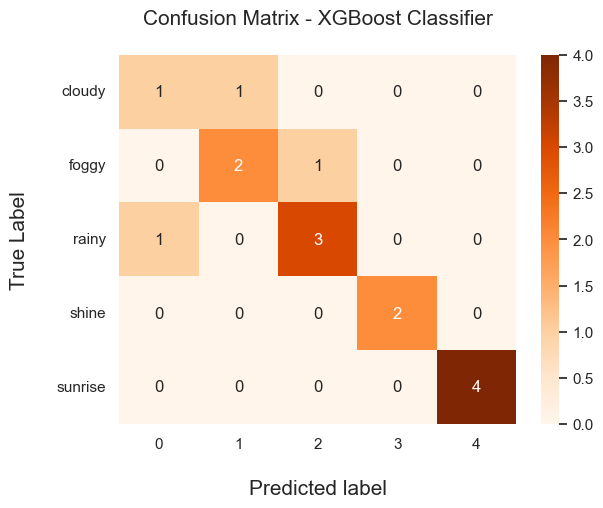

<Figure size 1500x1500 with 0 Axes>

In [37]:
plotPrediction(test_x, test_y, xbgc_pred)
plotConfusionMatrix(test_y, xbgc_pred, 'XGBoost Classifier')

# Support Vector Machine (SVM)

**kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} default='rbf'**

In [38]:
from sklearn.svm import SVC

In [39]:
svc_linear = SVC(C=1, kernel='linear', gamma='auto')
svc_linear.fit(train_x, train_y)
svc_linear_pred = svc_linear.predict(test_x)
print("Actual Result -", test_y)
print("Predicted Result -", svc_linear_pred)
print("Accuracy -", svc_linear.score(test_x, test_y))

Actual Result - [3 4 1 1 1 2 3 2 4 0 2 4 2 4 0]
Predicted Result - [3 4 1 1 1 0 3 1 4 1 2 4 0 4 0]
Accuracy - 0.7333333333333333


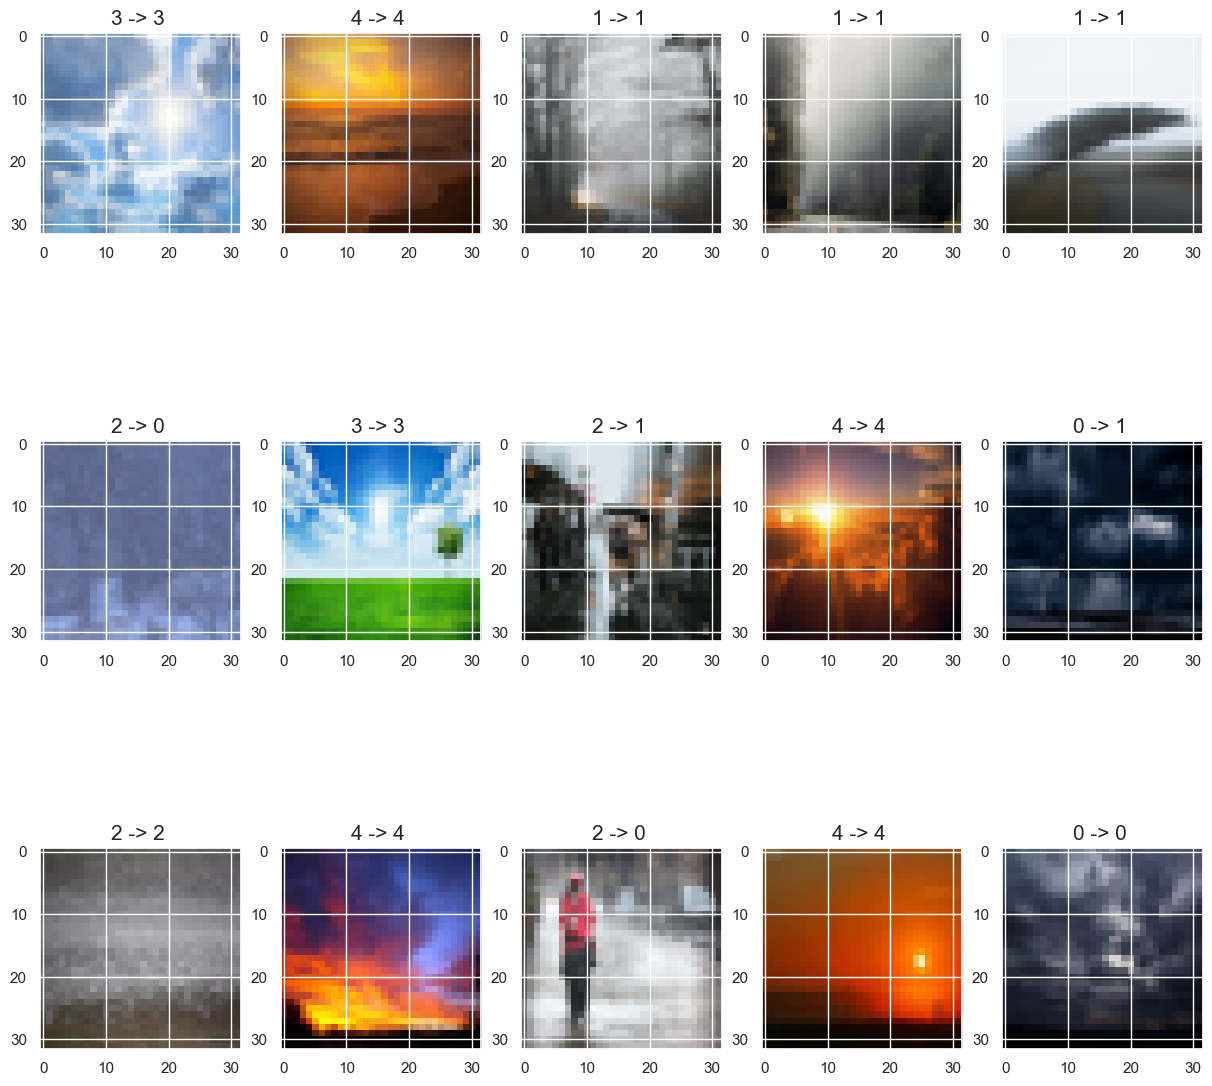

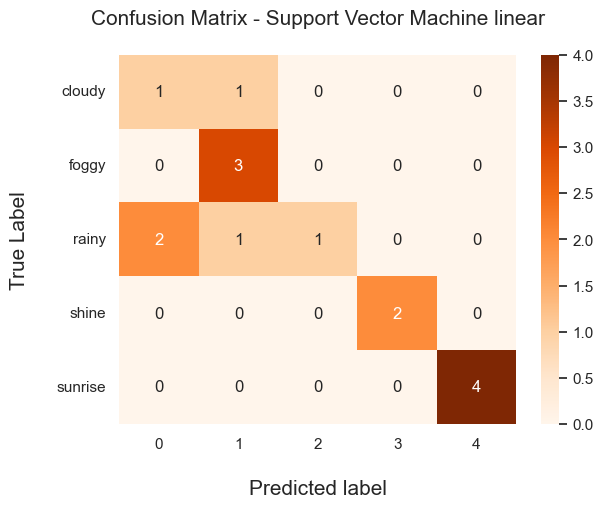

<Figure size 1500x1500 with 0 Axes>

In [40]:
plotPrediction(test_x, test_y, svc_linear_pred)
plotConfusionMatrix(test_y, svc_linear_pred, 'Support Vector Machine linear')

**kernel='poly'**

In [41]:
svc_poly = SVC(C=1, kernel='poly', gamma='auto')
svc_poly.fit(train_x, train_y)
svc_poly_pred = svc_poly.predict(test_x)
print("Actual Result -", test_y)
print("Predicted Result -", svc_poly_pred)
print("Accuracy -", svc_poly.score(test_x, test_y))

Actual Result - [3 4 1 1 1 2 3 2 4 0 2 4 2 4 0]
Predicted Result - [3 4 0 2 1 2 3 4 4 4 4 4 2 4 4]
Accuracy - 0.6


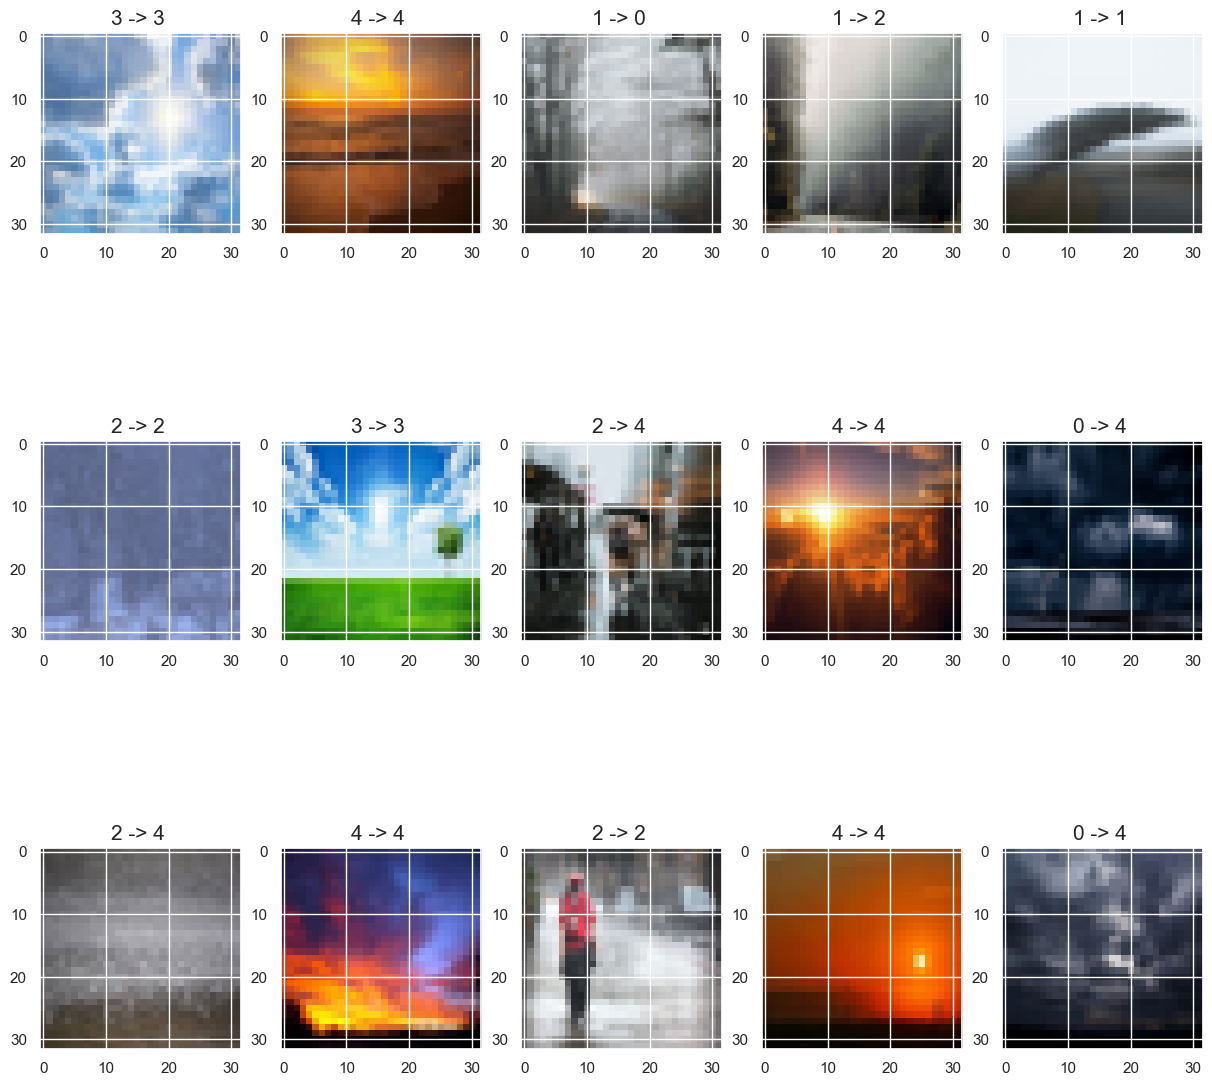

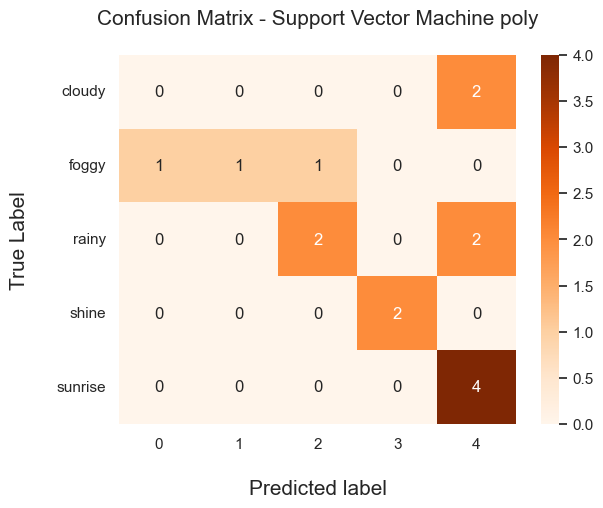

<Figure size 1500x1500 with 0 Axes>

In [42]:
plotPrediction(test_x, test_y, svc_poly_pred)
plotConfusionMatrix(test_y, svc_poly_pred, 'Support Vector Machine poly')

In [43]:
svc_rbf = SVC(C=1, kernel='rbf', gamma='auto')
svc_rbf.fit(train_x, train_y)
svc_rbf_pred = svc_rbf.predict(test_x)
print("Actual Result -", test_y)
print("Predicted Result -", svc_rbf_pred)
print("Accuracy -", svc_rbf.score(test_x, test_y))

Actual Result - [3 4 1 1 1 2 3 2 4 0 2 4 2 4 0]
Predicted Result - [3 4 1 1 1 2 3 1 4 2 0 4 2 4 0]
Accuracy - 0.8


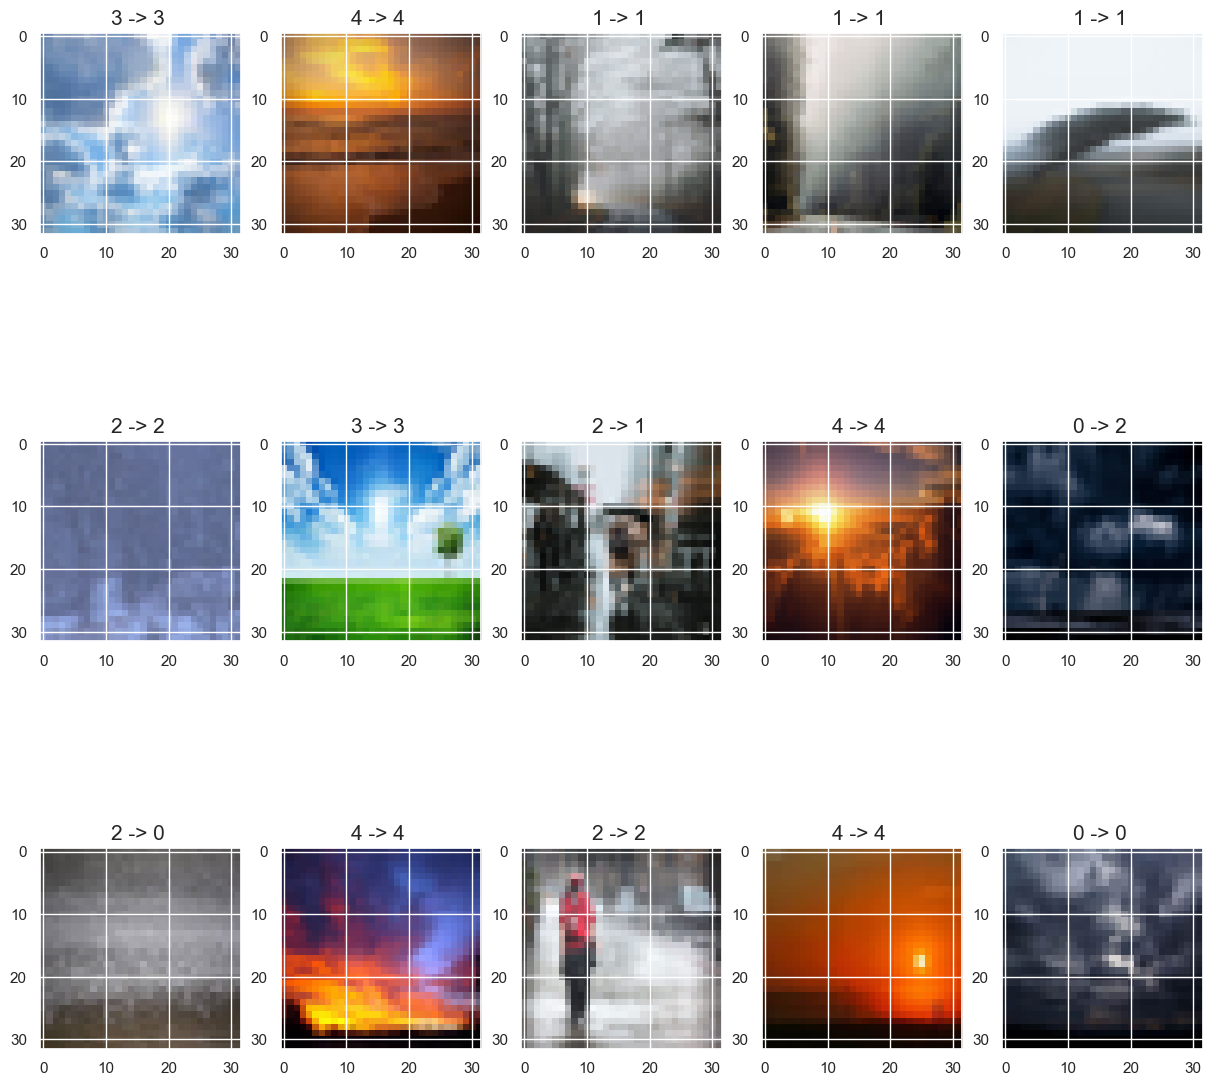

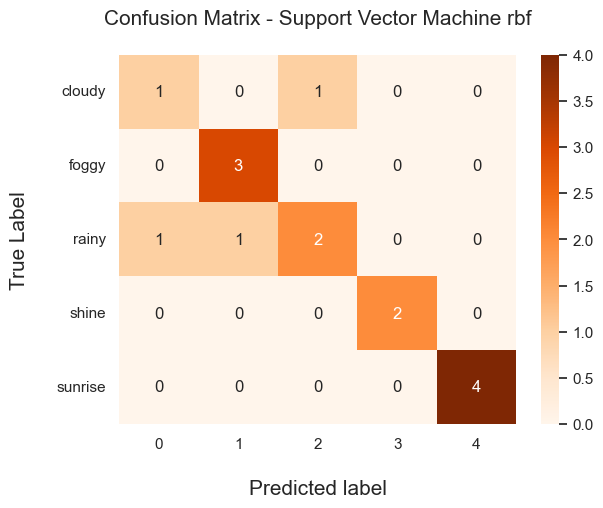

<Figure size 1500x1500 with 0 Axes>

In [44]:
plotPrediction(test_x, test_y, svc_rbf_pred)
plotConfusionMatrix(test_y, svc_rbf_pred, 'Support Vector Machine rbf')

In [45]:
svc_sigmoid = SVC(C=1, kernel='sigmoid', gamma='auto')
svc_sigmoid.fit(train_x, train_y)
svc_sigmoid_pred = svc_sigmoid.predict(test_x)
print("Actual Result -", test_y)
print("Predicted Result -", svc_sigmoid_pred)
print("Accuracy -", svc_sigmoid.score(test_x, test_y))

Actual Result - [3 4 1 1 1 2 3 2 4 0 2 4 2 4 0]
Predicted Result - [3 4 1 1 1 2 3 1 4 2 0 4 2 4 0]
Accuracy - 0.8


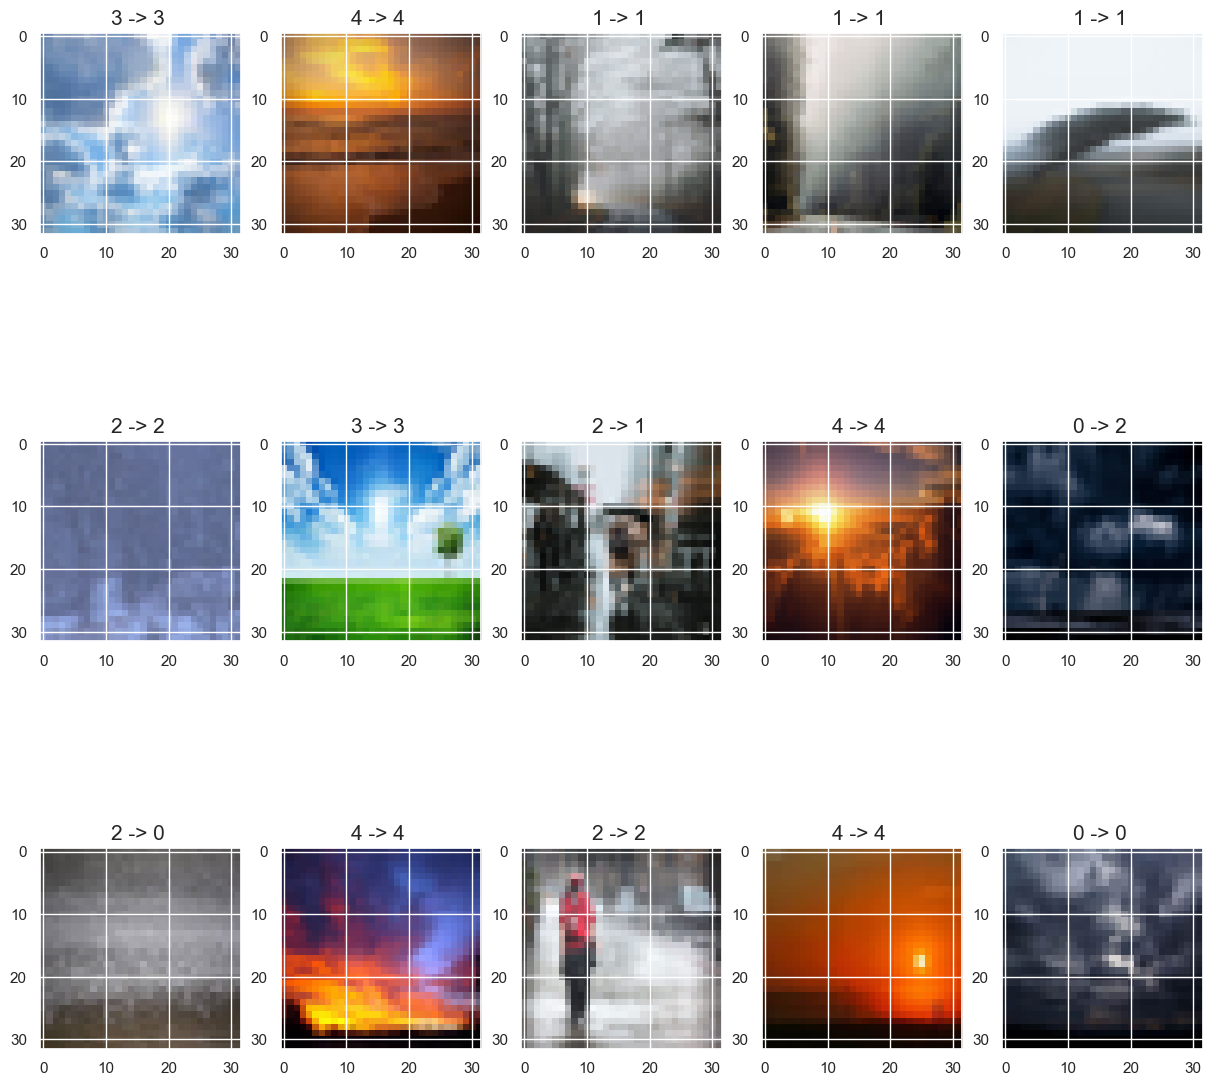

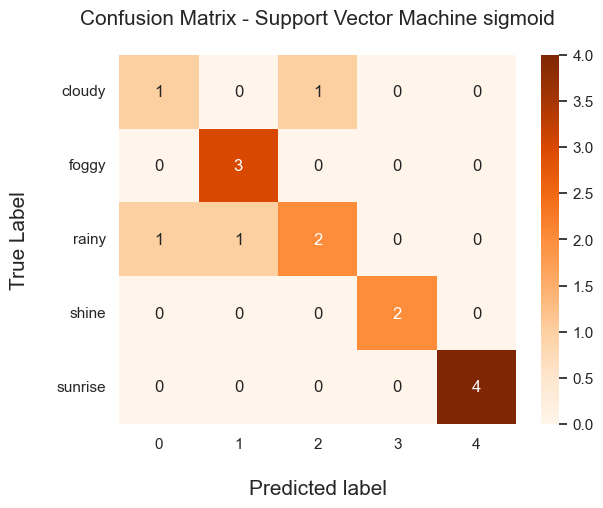

<Figure size 1500x1500 with 0 Axes>

In [46]:
plotPrediction(test_x, test_y, svc_sigmoid_pred)
plotConfusionMatrix(test_y, svc_sigmoid_pred, 'Support Vector Machine sigmoid')

In [47]:
from sklearn.model_selection import GridSearchCV

params = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['auto', 'scale']
}

svc = GridSearchCV(SVC(), params)
svc.fit(train_x, train_y)
svc_pred = svc.predict(test_x)

In [48]:
print("Actual Result -", test_y)
print("Predicted Result -", svc_pred)
print("Accuracy -", svc.score(test_x, test_y))

Actual Result - [3 4 1 1 1 2 3 2 4 0 2 4 2 4 0]
Predicted Result - [3 4 1 1 1 2 3 1 4 1 0 4 2 4 1]
Accuracy - 0.7333333333333333


In [49]:
svc.best_params_

{'gamma': 'scale', 'kernel': 'rbf'}

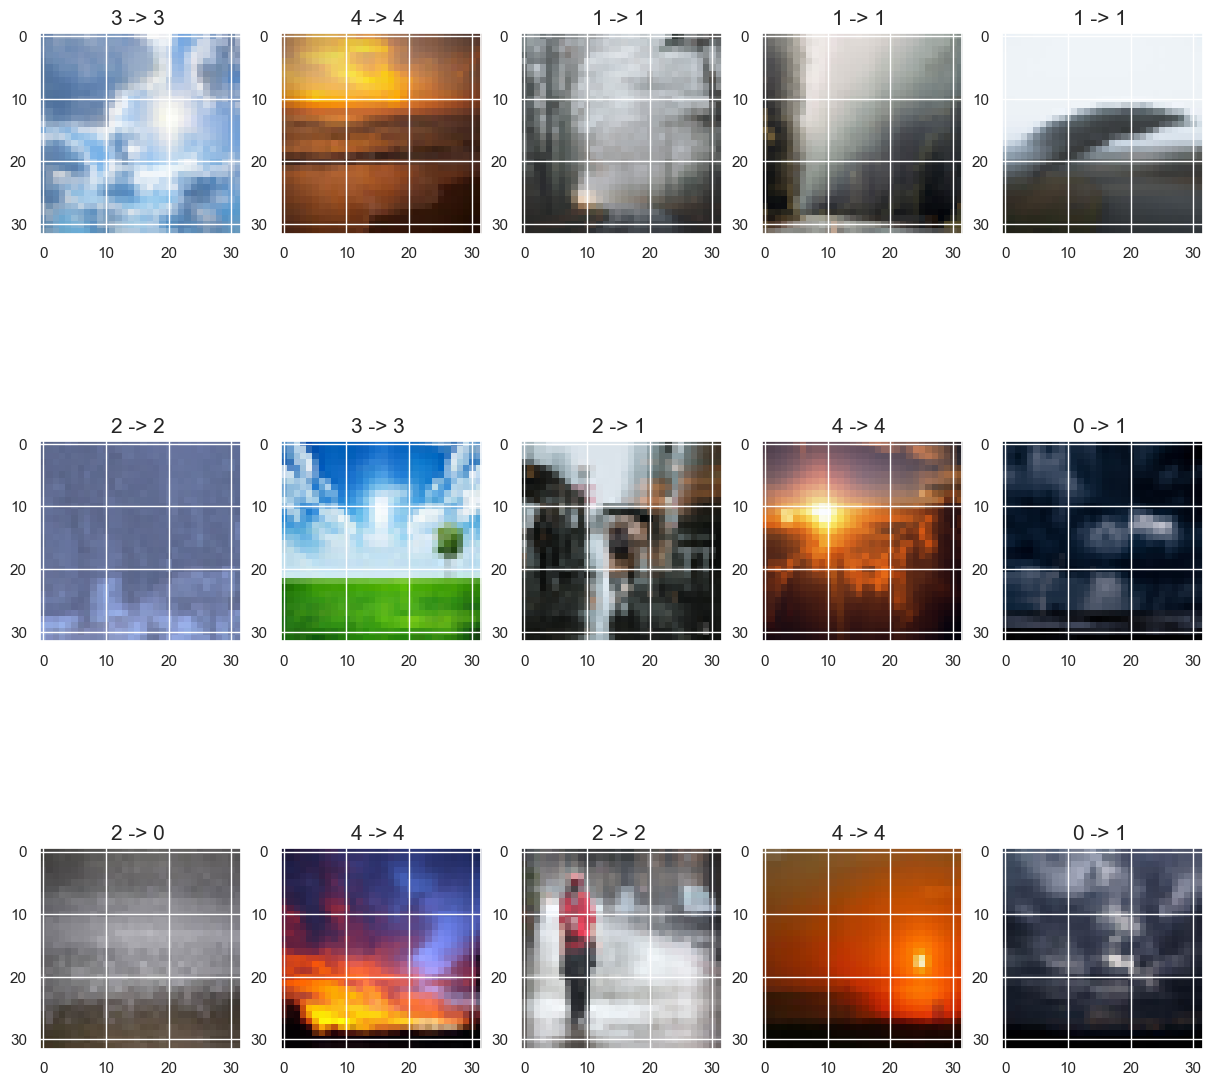

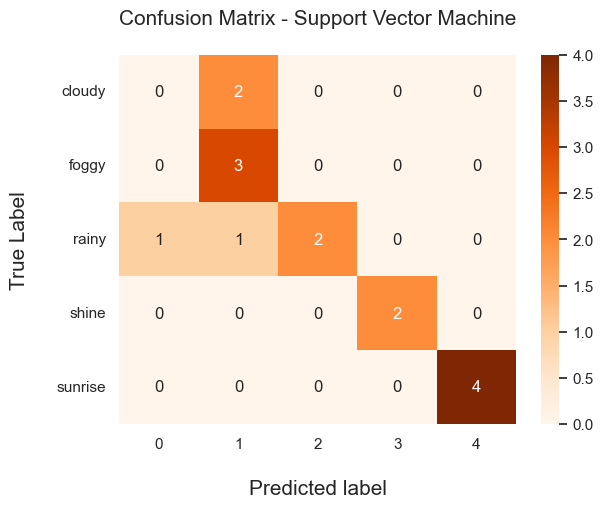

<Figure size 1500x1500 with 0 Axes>

In [50]:
plotPrediction(test_x, test_y, svc_pred)
plotConfusionMatrix(test_y, svc_pred, 'Support Vector Machine')

# Naive Bayes

In [51]:
from sklearn.naive_bayes import GaussianNB

In [52]:
nb = GaussianNB()
nb.fit(train_x, train_y)
nb_pred = nb.predict(test_x)
print("Actual Result -", test_y)
print("Predicted Result -", nb_pred)
print("Accuracy -", nb.score(test_x, test_y))

Actual Result - [3 4 1 1 1 2 3 2 4 0 2 4 2 4 0]
Predicted Result - [3 4 1 1 1 2 3 1 4 4 0 4 3 4 4]
Accuracy - 0.6666666666666666


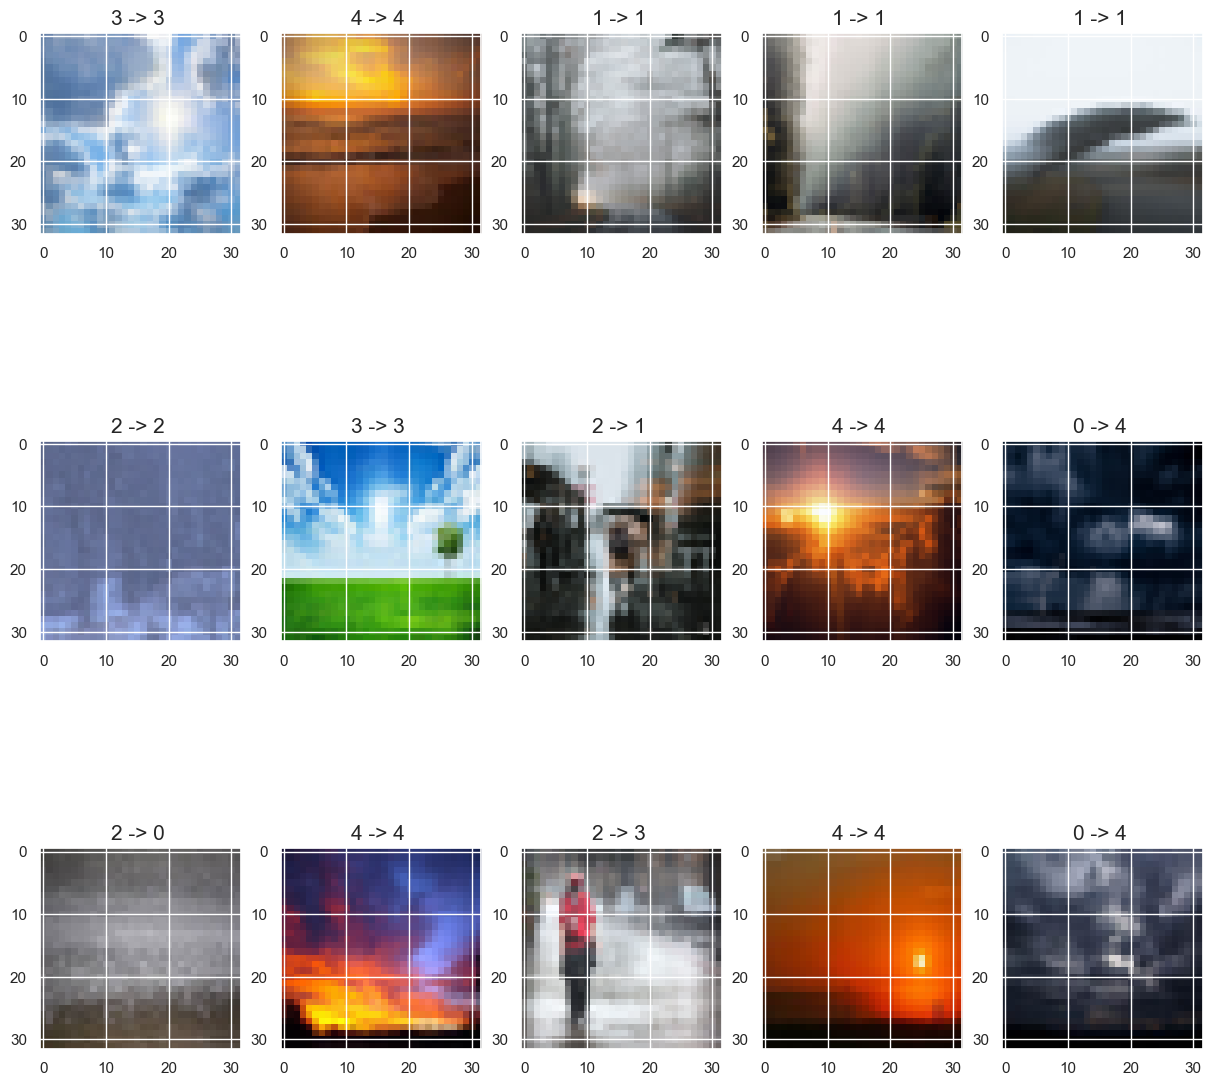

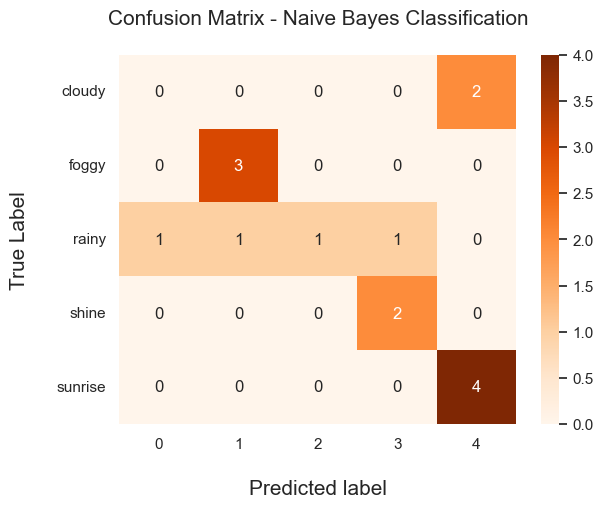

<Figure size 1500x1500 with 0 Axes>

In [53]:
plotPrediction(test_x, test_y, nb_pred)
plotConfusionMatrix(test_y, nb_pred, 'Naive Bayes Classification')

# K-Nearest Neighbors (KNN)

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [55]:
params = {
    'n_neighbors': range(1, len(test_y)//2),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

knn = GridSearchCV(KNeighborsClassifier(), params)
knn.fit(train_x, train_y)
knn_pred = knn.predict(test_x)

c:\Users\shiva\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\shiva\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [56]:
print("Actual Result -", test_y)
print("Predicted Result -", knn_pred)
print("Accuracy -", knn.score(test_x, test_y))

Actual Result - [3 4 1 1 1 2 3 2 4 0 2 4 2 4 0]
Predicted Result - [3 4 1 1 1 2 3 1 4 1 2 4 2 4 1]
Accuracy - 0.8


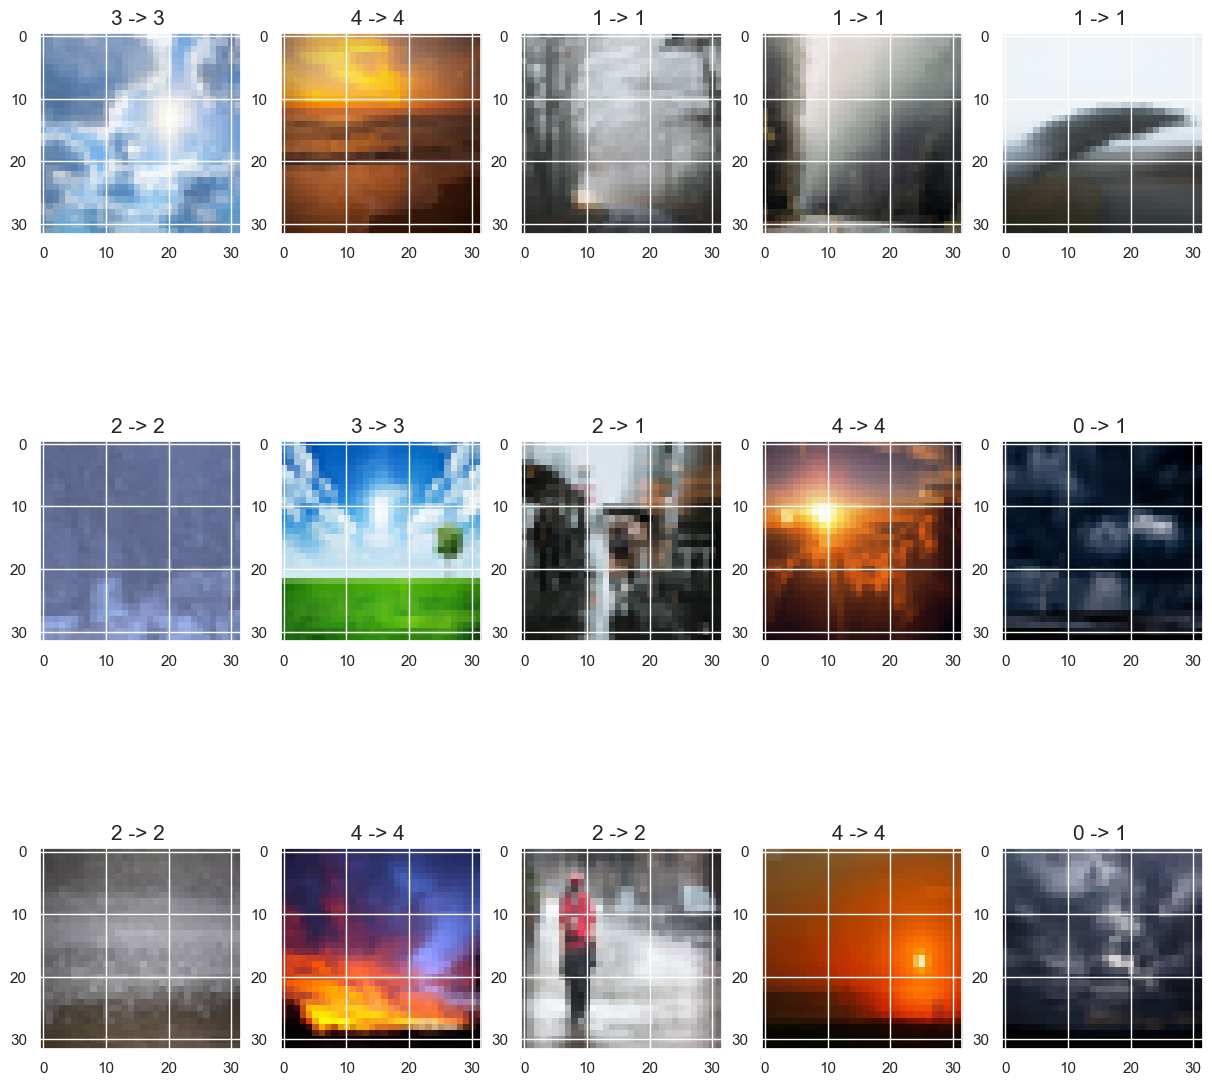

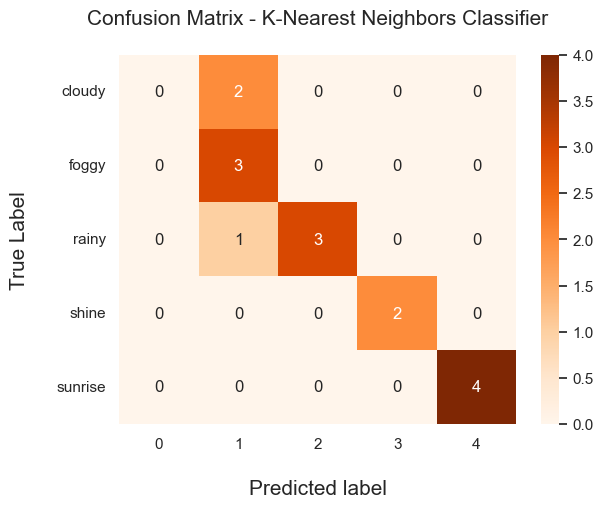

<Figure size 1500x1500 with 0 Axes>

In [57]:
plotPrediction(test_x, test_y, knn_pred)
plotConfusionMatrix(test_y, knn_pred, 'K-Nearest Neighbors Classifier')

# K-Means Clustering

In [58]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [59]:
kmean = KMeans(n_clusters=5)
kmean.fit(train_x)
kmean_pred = kmean.predict(test_x)

In [60]:
def retrieve_info(cluster_labels, y_train):
    reference_labels = dict()
    for i in range(len(np.unique(kmean.labels_))):
        index = np.where(cluster_labels == i, 1, 0)
        num = np.bincount(y_train[index==1]).argmax()
        reference_labels[i] = num
    return reference_labels

In [61]:
reference_labels = retrieve_info(kmean.labels_, train_y)
number_labels_train = np.random.rand(len(kmean.labels_))
for i in range(len(kmean.labels_)):
    number_labels_train[i] = reference_labels[kmean.labels_[i]]
print("Actual Result -", train_y)
print("Predicted Result -", number_labels_train.astype('int'))
print("Accuracy -", accuracy_score(number_labels_train, train_y))

Actual Result - [4 4 2 ... 2 4 3]
Predicted Result - [1 1 3 ... 2 4 1]
Accuracy - 0.5037037037037037


In [62]:
reference_labels = retrieve_info(kmean_pred, test_y)
number_labels_test = np.random.rand(len(kmean_pred))
for i in range(len(kmean_pred)):
    number_labels_test[i] = reference_labels[kmean_pred[i]]
print("Actual Result -", test_y)
print("Predicted Result -", number_labels_test.astype('int'))
print("Accuracy -", accuracy_score(number_labels_test, test_y))

Actual Result - [3 4 1 1 1 2 3 2 4 0 2 4 2 4 0]
Predicted Result - [3 4 1 1 1 2 3 0 4 0 2 0 3 4 0]
Accuracy - 0.8


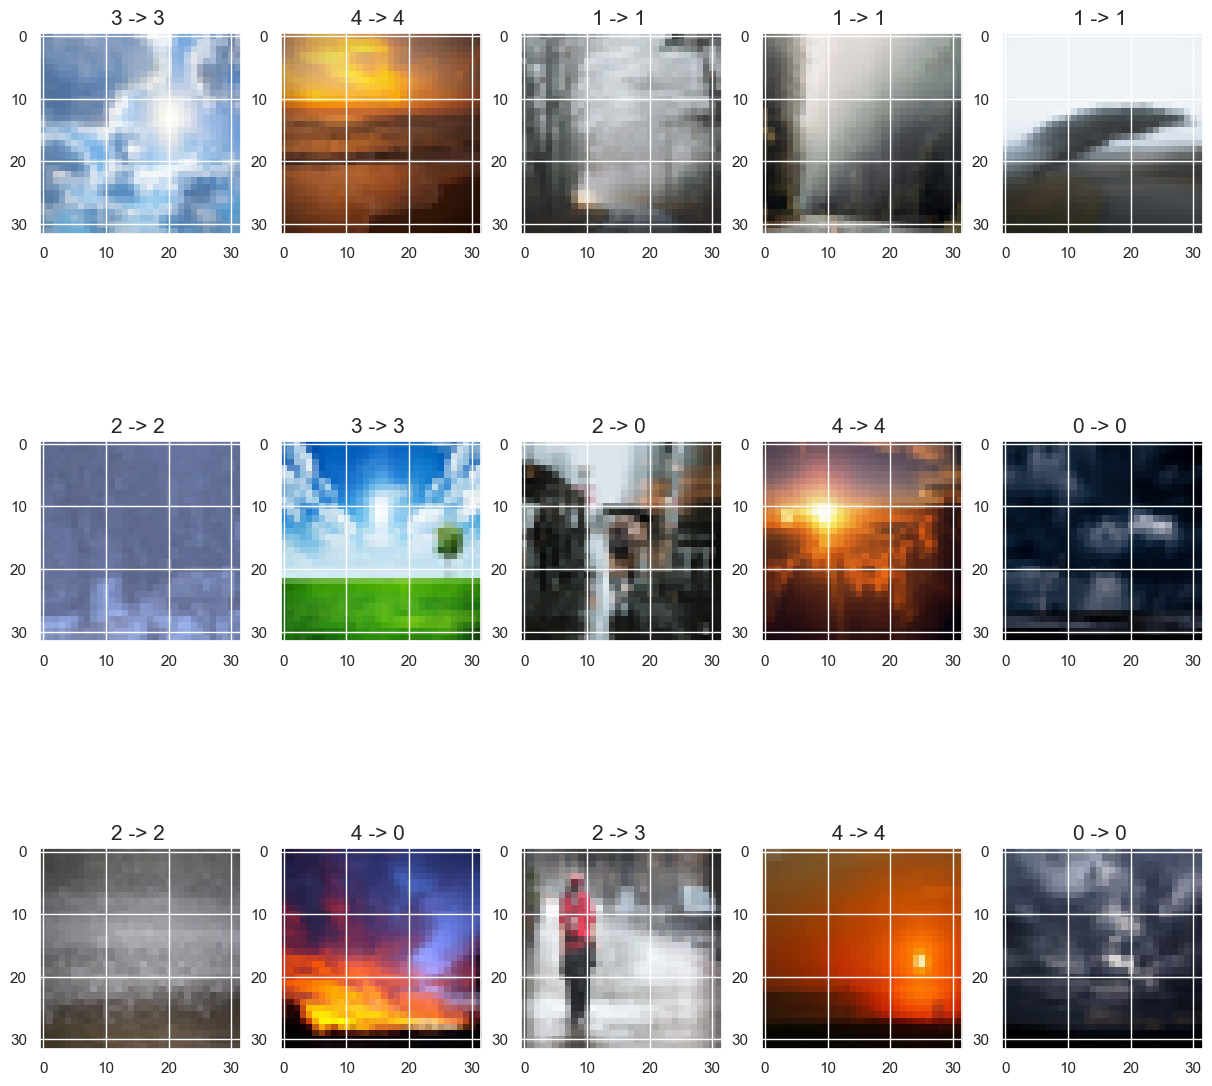

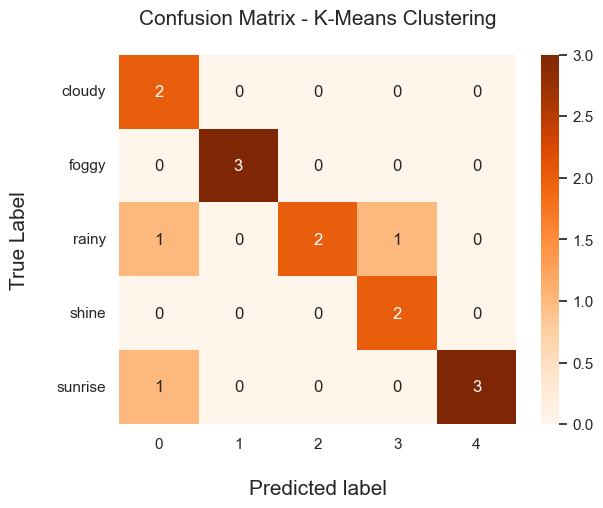

<Figure size 1500x1500 with 0 Axes>

In [63]:
plotPrediction(test_x, test_y, number_labels_test.astype('int'))
plotConfusionMatrix(test_y, number_labels_test.astype('int'), 'K-Means Clustering')

**silhouette**

In [64]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [65]:
silhouette_vals = silhouette_samples(test_x, kmean_pred)

score = silhouette_score(train_x, kmean.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.130


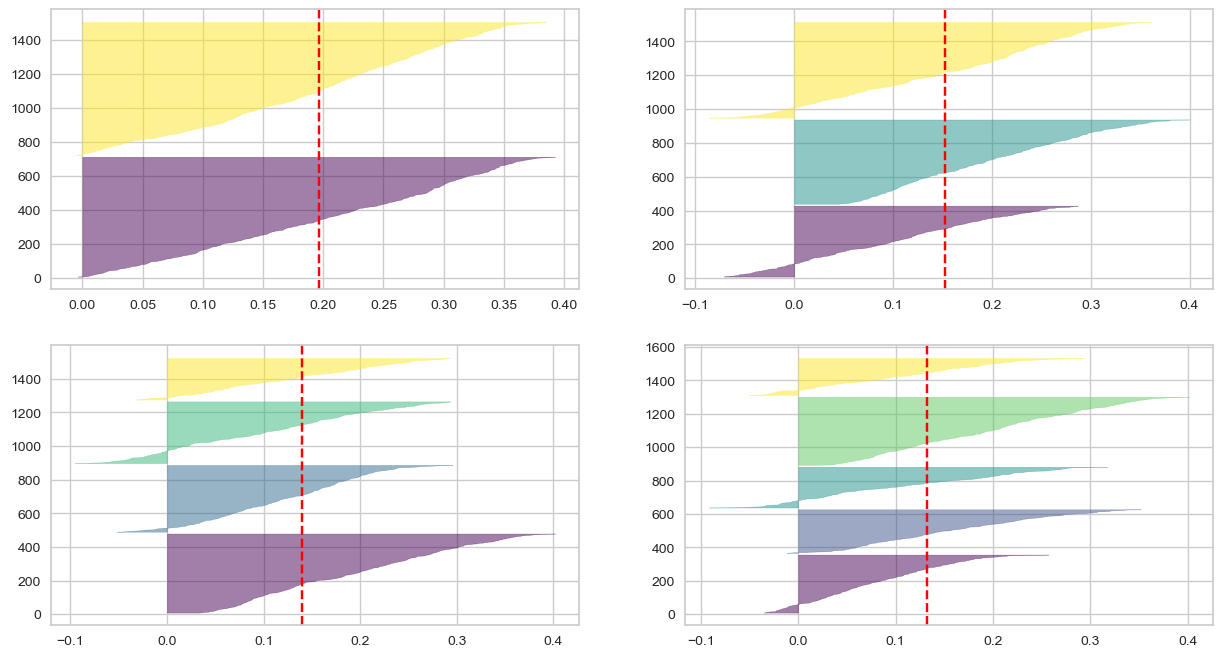

In [66]:
from yellowbrick.cluster import SilhouetteVisualizer
 
def visual_silhoutte(train_x):
    fig, ax = plt.subplots(2, 2, figsize=(15,8))
    for i in range(2,6):
        # Create KMeans instance for different number of clusters
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=150, random_state=42)
        q, mod = divmod(i, 2)

        # Create SilhouetteVisualizer instance with KMeans instance
        # Fit the visualizer
        visualizer = SilhouetteVisualizer(km, colors='viridis', ax=ax[q-1][mod])
        visualizer.fit(train_x) 
visual_silhoutte(train_x)

# Perceptron

In [67]:
from sklearn.neural_network import MLPClassifier

In [68]:
mlp = MLPClassifier()
mlp.fit(train_x, train_y)
mlp_pred = mlp.predict(test_x)
print("Actual Result -", test_y)
print("Predicted Result -", mlp_pred)
print("Accuracy -", mlp.score(test_x, test_y))

Actual Result - [3 4 1 1 1 2 3 2 4 0 2 4 2 4 0]
Predicted Result - [3 4 1 1 1 0 3 1 4 0 0 4 2 4 0]
Accuracy - 0.8


c:\Users\shiva\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


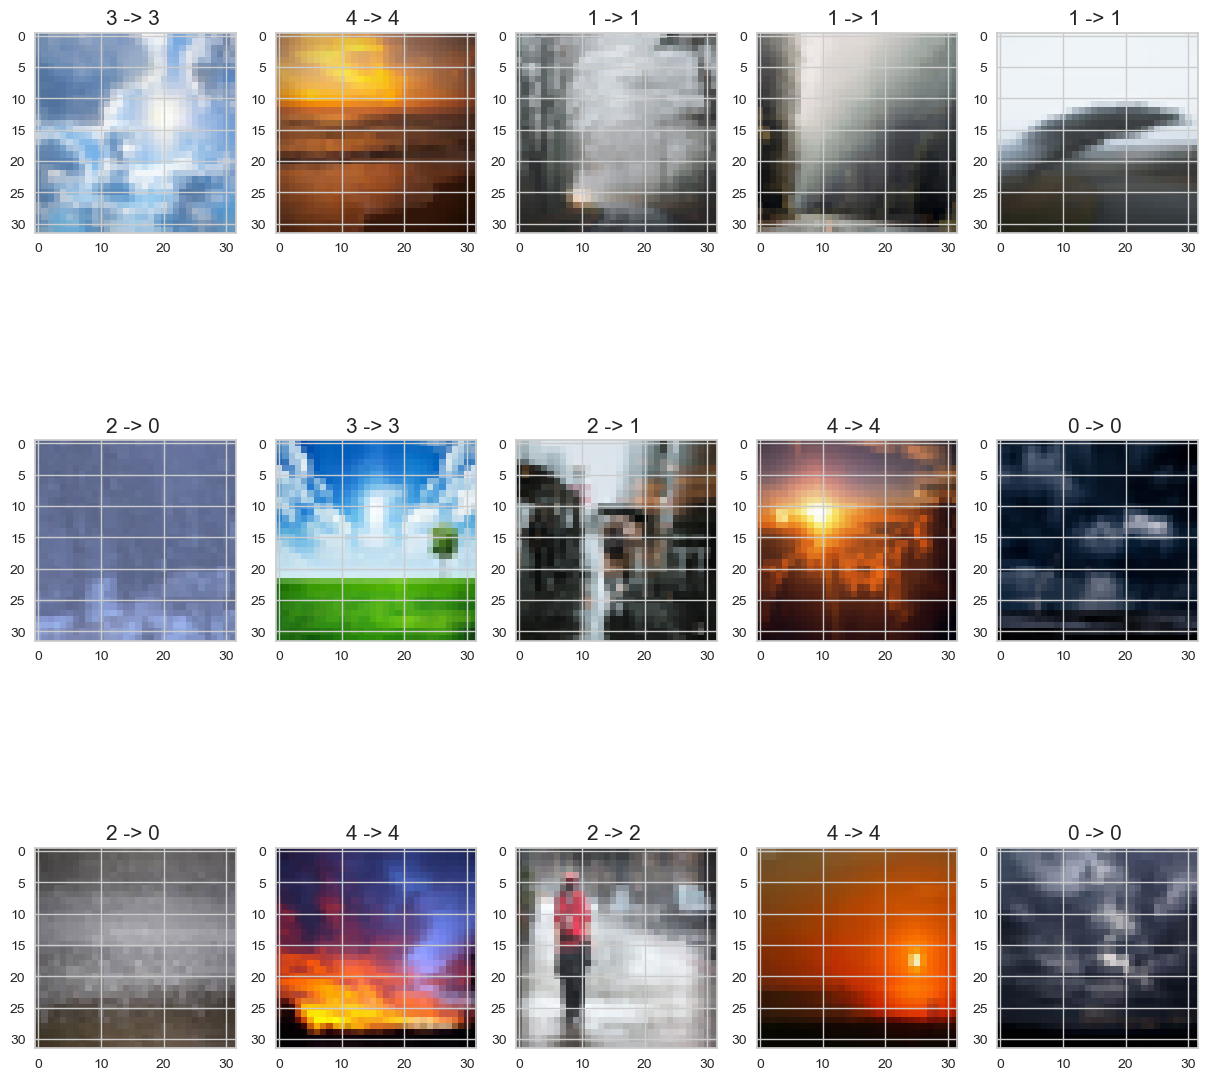

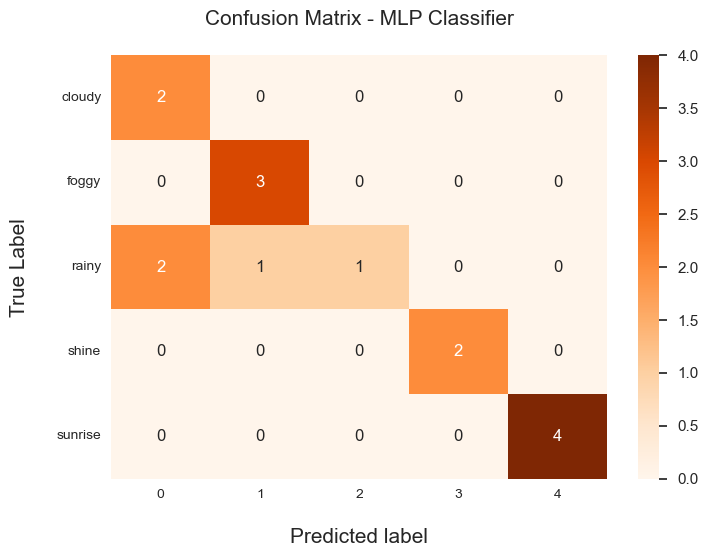

<Figure size 1500x1500 with 0 Axes>

In [69]:
plotPrediction(test_x, test_y, mlp_pred)
plotConfusionMatrix(test_y, mlp_pred, 'MLP Classifier')

# Binary Classifier

In [70]:
from sklearn.linear_model import SGDClassifier

**Cloudy Image Classification**

In [71]:
y_train = (train_y == 1)
y_test = (test_y == 1)

In [72]:
sgd_clf = SGDClassifier()
sgd_clf.fit(train_x, y_train)
sgd_clf_pred = sgd_clf.predict(test_x)
print("Actual Result -", test_y)
print("Predicted Result -", sgd_clf_pred)
print("Accuracy -", sgd_clf.score(test_x, y_test))

Actual Result - [3 4 1 1 1 2 3 2 4 0 2 4 2 4 0]
Predicted Result - [False False False  True  True False False  True False False False False
 False False False]
Accuracy - 0.8666666666666667


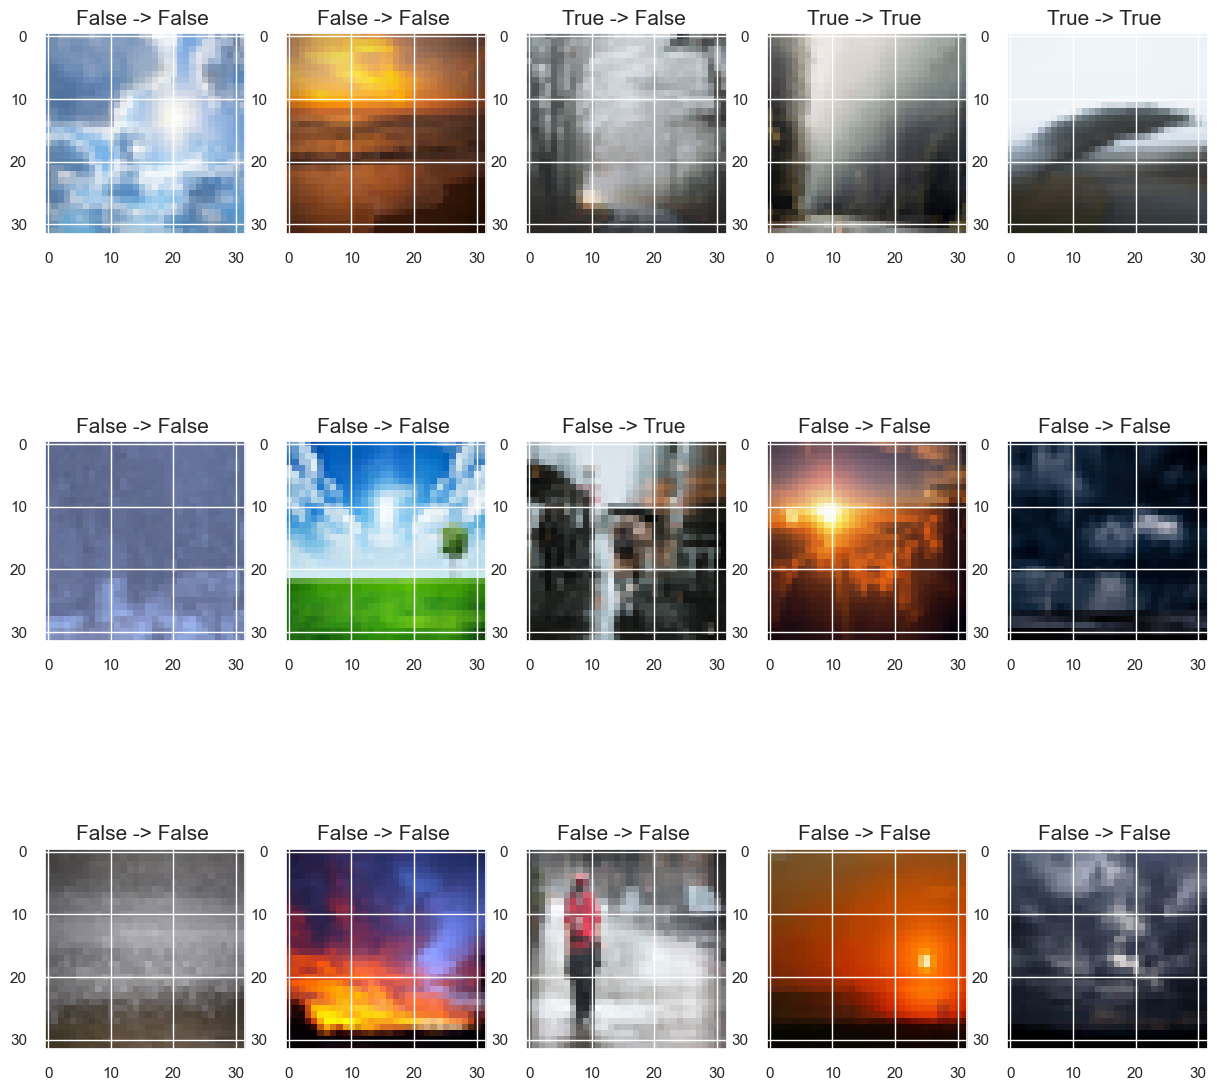

In [73]:
plotPrediction(test_x, y_test, sgd_clf_pred)

# Principal Component Analysis (PCA)

In [74]:
from sklearn.decomposition import PCA

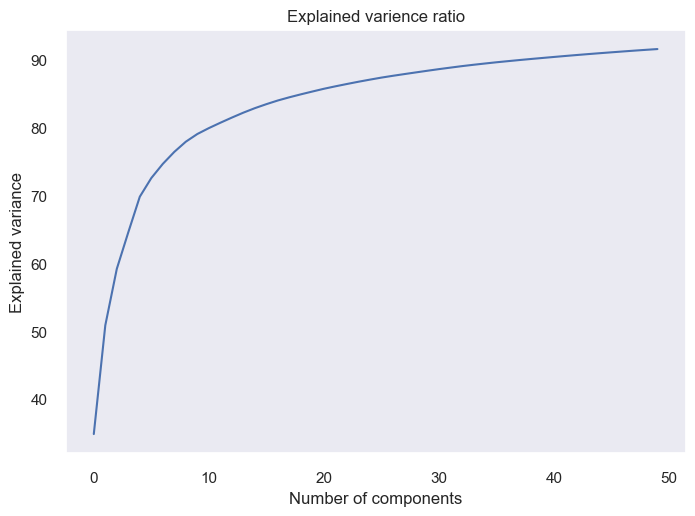

In [75]:
pca_50 = PCA(n_components=50)
pca_50.fit(x_new)
plt.plot(np.cumsum(pca_50.explained_variance_ratio_ * 100))
plt.title('Explained varience ratio')
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.grid()

**n_components=5**

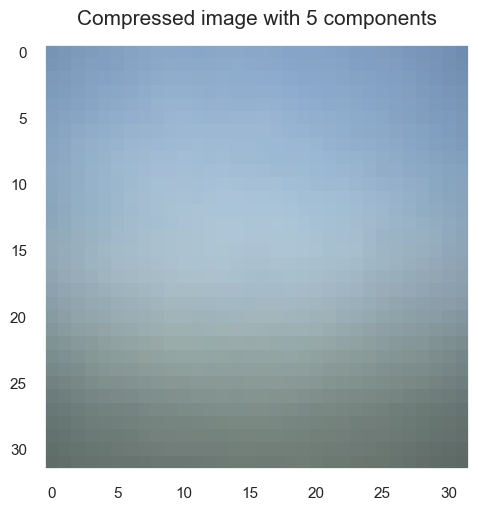

In [76]:
pca_5 = PCA(n_components=5)
pca_5_reduced = pca_5.fit_transform(x_new)
pca_5_recovered = pca_5.inverse_transform(pca_5_reduced)

image_pca_5 = pca_5_recovered[1].reshape([32, 32, 3])
plt.imshow(image_pca_5)
plt.title('Compressed image with 5 components', fontsize=15, pad=15)
plt.grid(False)

In [77]:
kmean_pca_5 = KMeans(n_clusters=5)
kmean_pca_5.fit(pca_5_reduced)
y_pred = kmean_pca_5.predict(pca_5_reduced)
print("Actual Result -", y_new)
print("Predicted Result -", kmean_pca_5.predict(pca_5_reduced))
print("Accuracy -", accuracy_score(kmean_pca_5.predict(pca_5_reduced), y_new))

Actual Result - [0 0 0 ... 4 4 4]
Predicted Result - [2 3 2 ... 4 4 4]
Accuracy - 0.3626666666666667


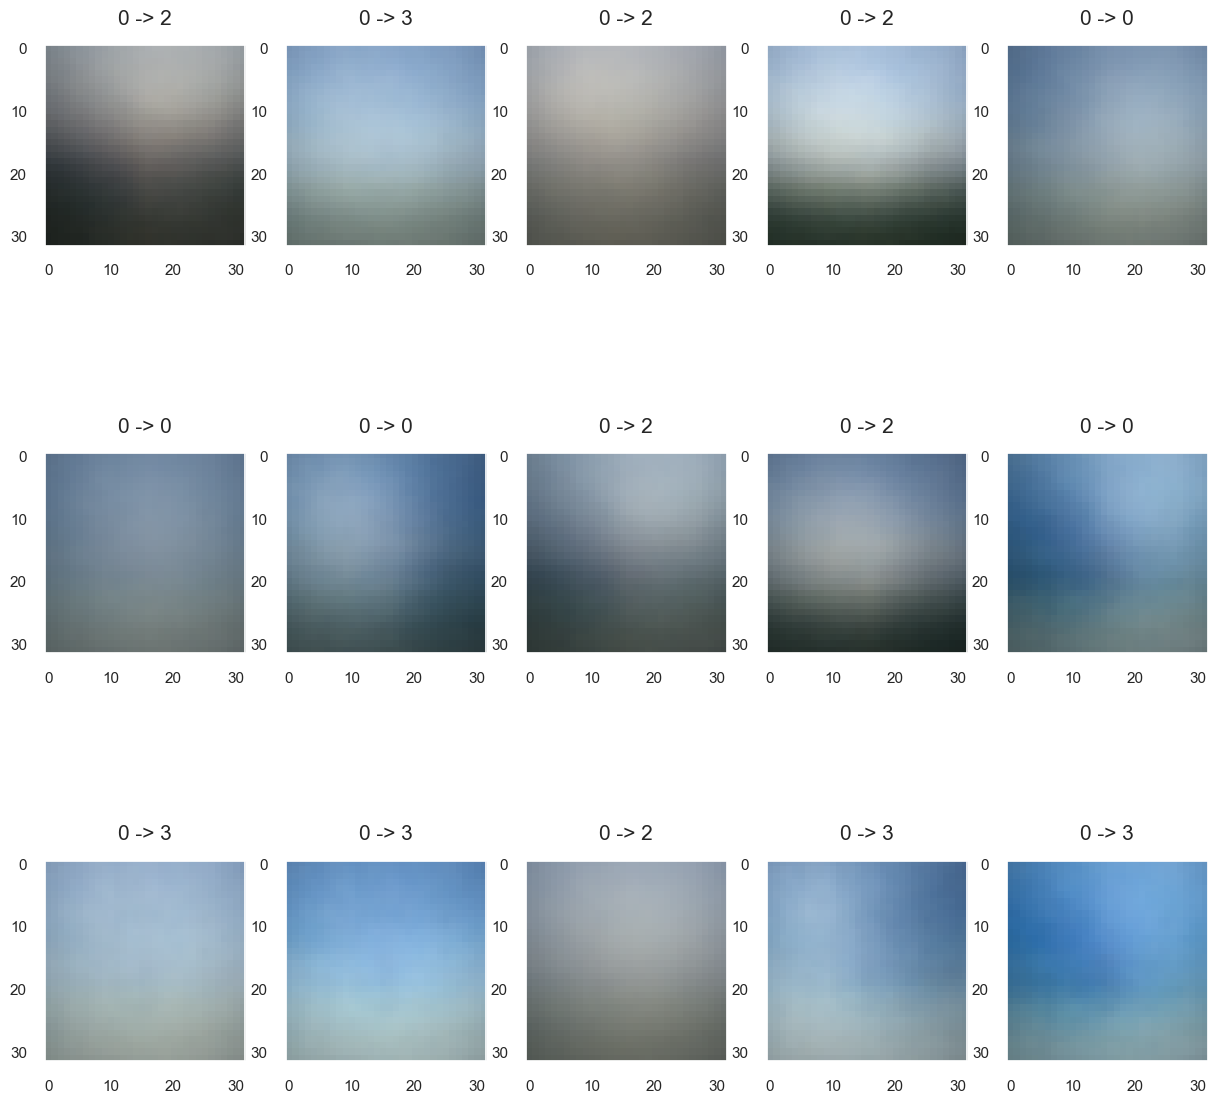

In [78]:
plt.figure(figsize=(15, 15))
pred = kmean_pca_5.predict(pca_5_reduced)
for i in range(15):
    plt.subplot(3, 5, i+1)
    image_pca_5 = pca_5_recovered[i].reshape([32, 32, 3])
    plt.imshow(image_pca_5)
    plt.title(f'{y_new[i]} -> {pred[i]}', fontsize=15, pad=15)
    plt.grid(False)

Silhouetter Score with 5 components: 0.220


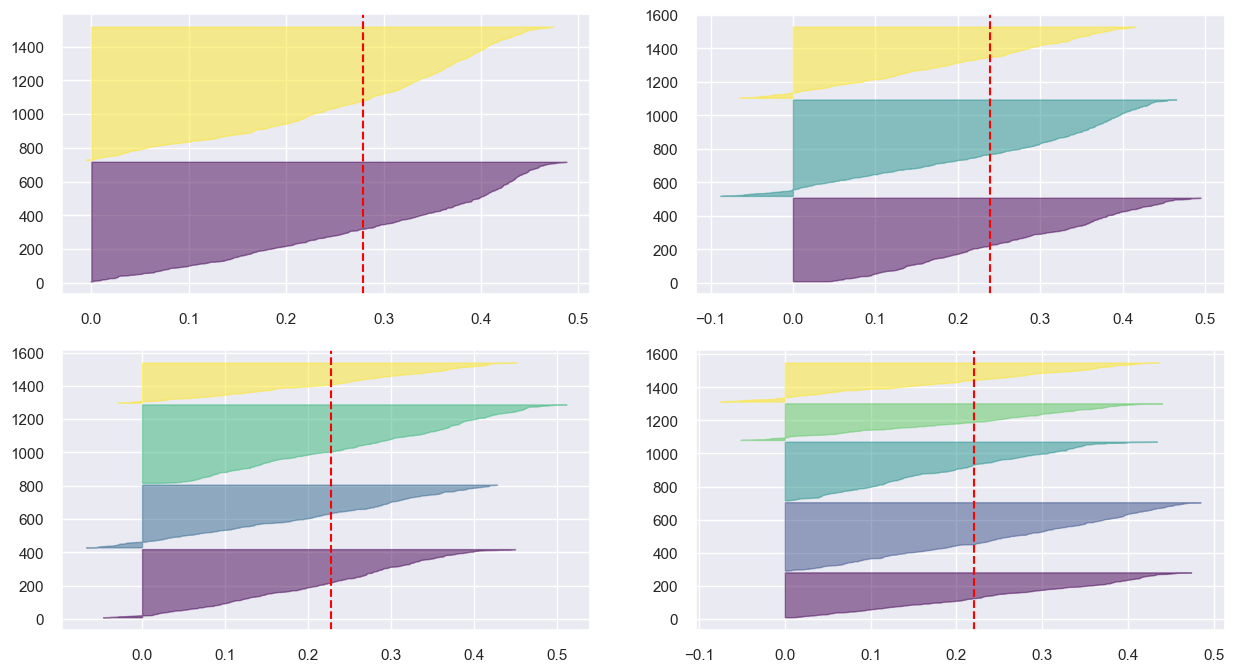

In [79]:
score = silhouette_score(pca_5_reduced, kmean_pca_5.labels_, metric='euclidean')
print('Silhouetter Score with 5 components: %.3f' % score)
visual_silhoutte(pca_5_reduced)

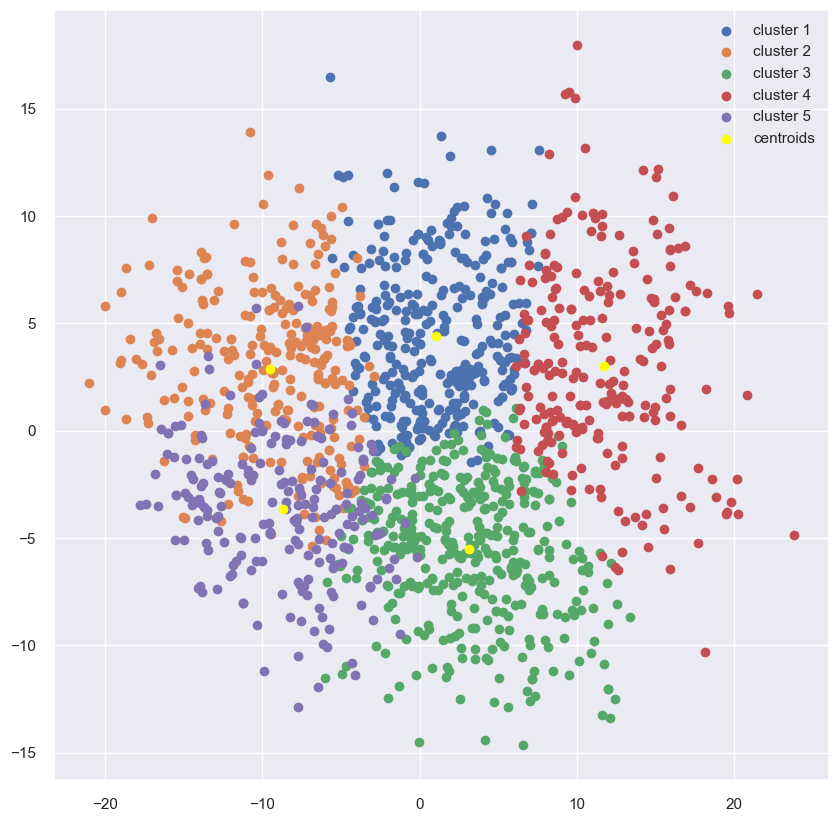

In [80]:
plt.figure(figsize=(10,10))
plt.scatter(pca_5_reduced[y_pred==0, 0], pca_5_reduced[y_pred==0, 1], label='cluster 1')
plt.scatter(pca_5_reduced[y_pred==1, 0], pca_5_reduced[y_pred==1, 1], label='cluster 2')
plt.scatter(pca_5_reduced[y_pred==2, 0], pca_5_reduced[y_pred==2, 1], label='cluster 3')
plt.scatter(pca_5_reduced[y_pred==3, 0], pca_5_reduced[y_pred==3, 1], label='cluster 4')
plt.scatter(pca_5_reduced[y_pred==4, 0], pca_5_reduced[y_pred==4, 1], label='cluster 5')
plt.scatter(kmean_pca_5.cluster_centers_[:,0], kmean_pca_5.cluster_centers_[:,1], c='yellow', label='centroids')
plt.legend()


**n_components=10**

Text(0.5, 1.0, 'Compressed image with 10 components')

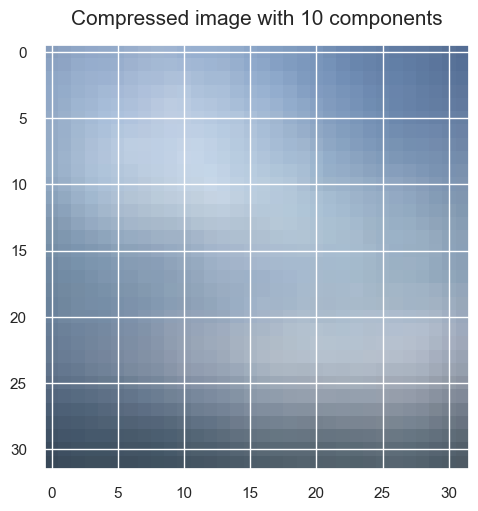

In [81]:
pca_10 = PCA(n_components=10)
pca_10_reduced = pca_10.fit_transform(x_new)
pca_10_recovered = pca_10.inverse_transform(pca_10_reduced)

image_pca_10 = pca_10_recovered[1].reshape([32, 32, 3])
plt.imshow(image_pca_10)
plt.title('Compressed image with 10 components', fontsize=15, pad=15)

In [82]:
kmean_pca_10 = KMeans(n_clusters=5)
kmean_pca_10.fit(pca_10_reduced)
y_pred = kmean_pca_10.predict(pca_10_reduced)
print("Actual Result -", y_new)
print("Predicted Result -", kmean_pca_10.predict(pca_10_reduced))
print("Accuracy -", accuracy_score(kmean_pca_10.predict(pca_10_reduced), y_new))

Actual Result - [0 0 0 ... 4 4 4]
Predicted Result - [2 0 2 ... 3 3 3]
Accuracy - 0.10666666666666667


Silhouetter Score with 10 components: 0.182


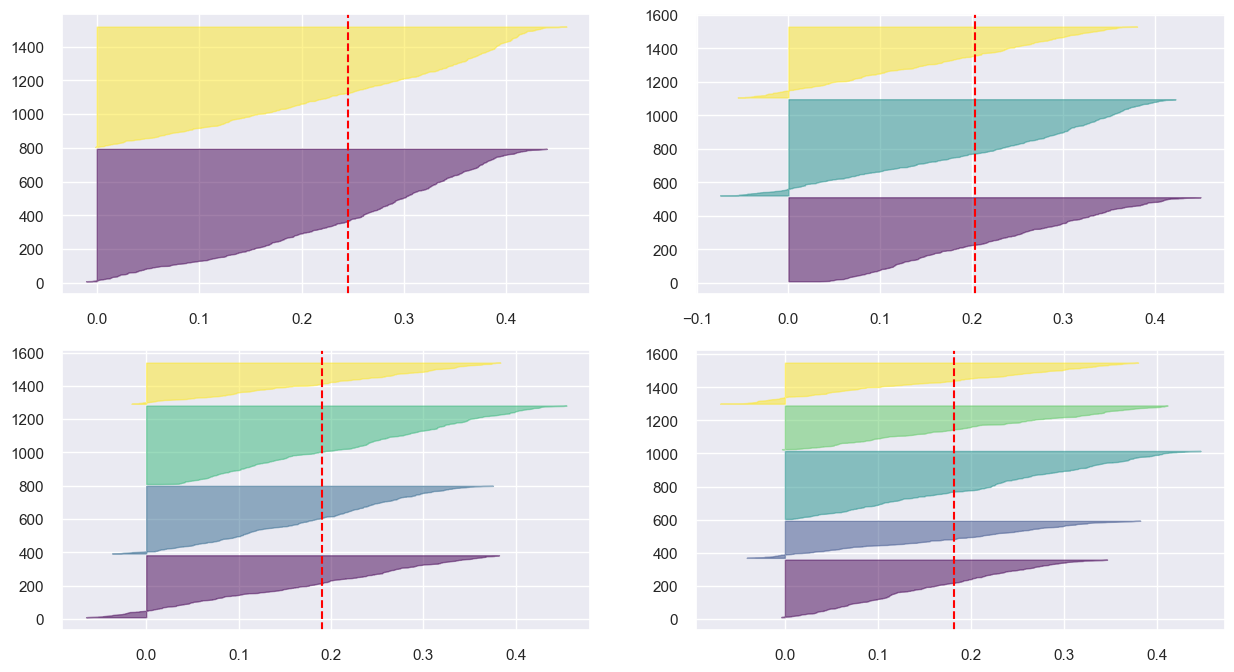

In [83]:
score = silhouette_score(pca_10_reduced, kmean_pca_10.labels_, metric='euclidean')
print('Silhouetter Score with 10 components: %.3f' % score)
visual_silhoutte(pca_10_reduced)

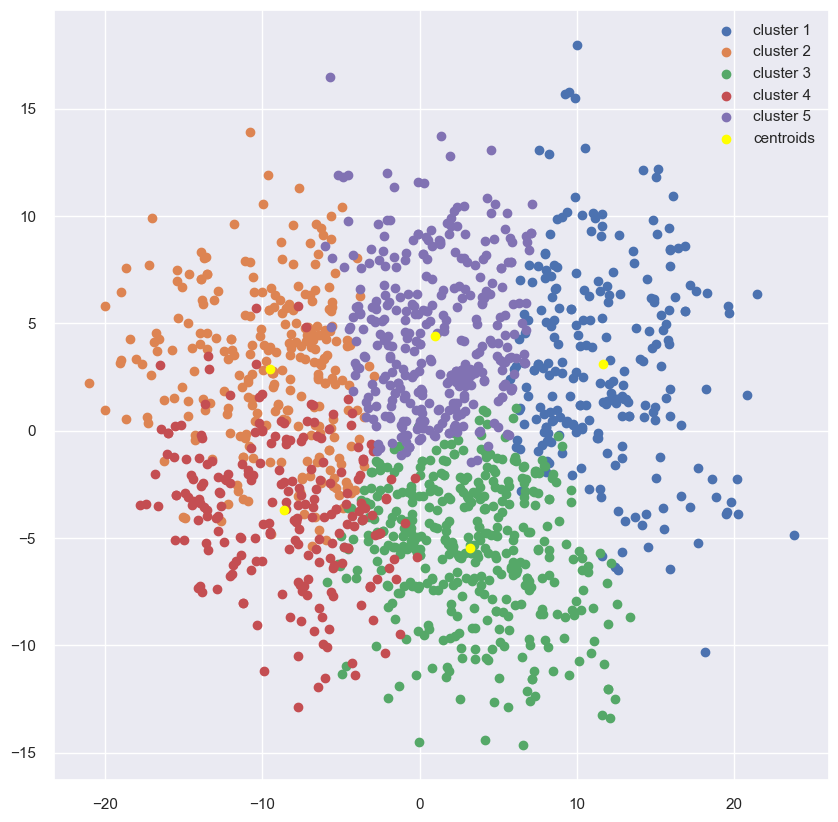

In [84]:
plt.figure(figsize=(10,10))
plt.scatter(pca_10_reduced[y_pred==0, 0], pca_10_reduced[y_pred==0, 1], label='cluster 1')
plt.scatter(pca_10_reduced[y_pred==1, 0], pca_10_reduced[y_pred==1, 1], label='cluster 2')
plt.scatter(pca_10_reduced[y_pred==2, 0], pca_10_reduced[y_pred==2, 1], label='cluster 3')
plt.scatter(pca_10_reduced[y_pred==3, 0], pca_10_reduced[y_pred==3, 1], label='cluster 4')
plt.scatter(pca_10_reduced[y_pred==4, 0], pca_10_reduced[y_pred==4, 1], label='cluster 5')
plt.scatter(kmean_pca_10.cluster_centers_[:,0], kmean_pca_10.cluster_centers_[:,1], c='yellow', label='centroids')
plt.legend()

**n_components=15**

Text(0.5, 1.0, 'Compressed image with 15 components')

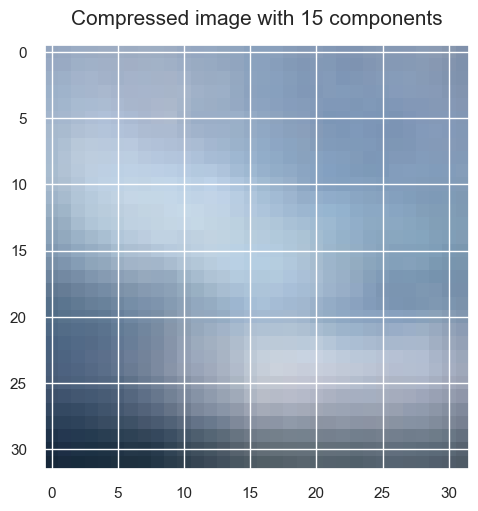

In [85]:
pca_15 = PCA(n_components=15)
pca_15_reduced = pca_15.fit_transform(x_new)
pca_15_recovered = pca_15.inverse_transform(pca_15_reduced)

image_pca_15 = pca_15_recovered[1].reshape([32, 32, 3])
plt.imshow(image_pca_15)
plt.title('Compressed image with 15 components', fontsize=15, pad=15)

In [86]:
kmean_pca_15 = KMeans(n_clusters=5)
kmean_pca_15.fit(pca_15_reduced)
y_pred = kmean_pca_15.predict(pca_15_reduced)

print("Actual Result -", y_new)
print("Predicted Result -", kmean_pca_15.predict(pca_15_reduced))
print("Accuracy -", accuracy_score(kmean_pca_15.predict(pca_15_reduced), y_new))

Actual Result - [0 0 0 ... 4 4 4]
Predicted Result - [3 0 3 ... 1 1 1]
Accuracy - 0.12066666666666667


Silhouetter Score with 15 components: 0.169


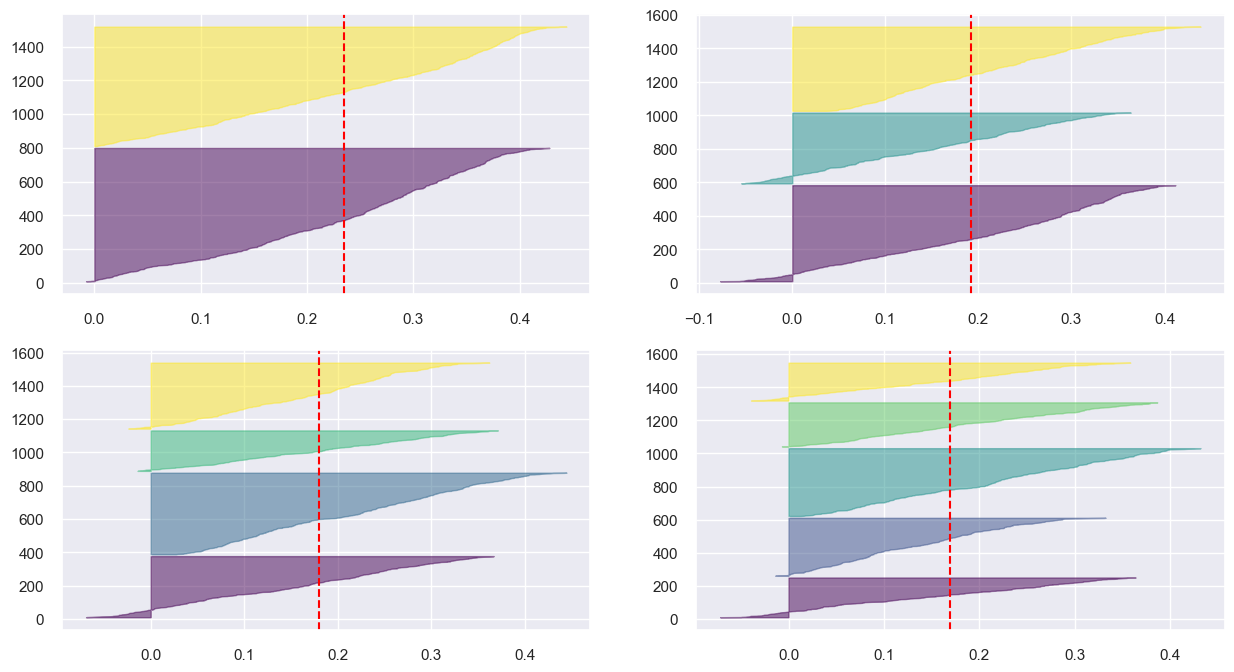

In [87]:
score = silhouette_score(pca_15_reduced, kmean_pca_15.labels_, metric='euclidean')
print('Silhouetter Score with 15 components: %.3f' % score)
visual_silhoutte(pca_15_reduced)

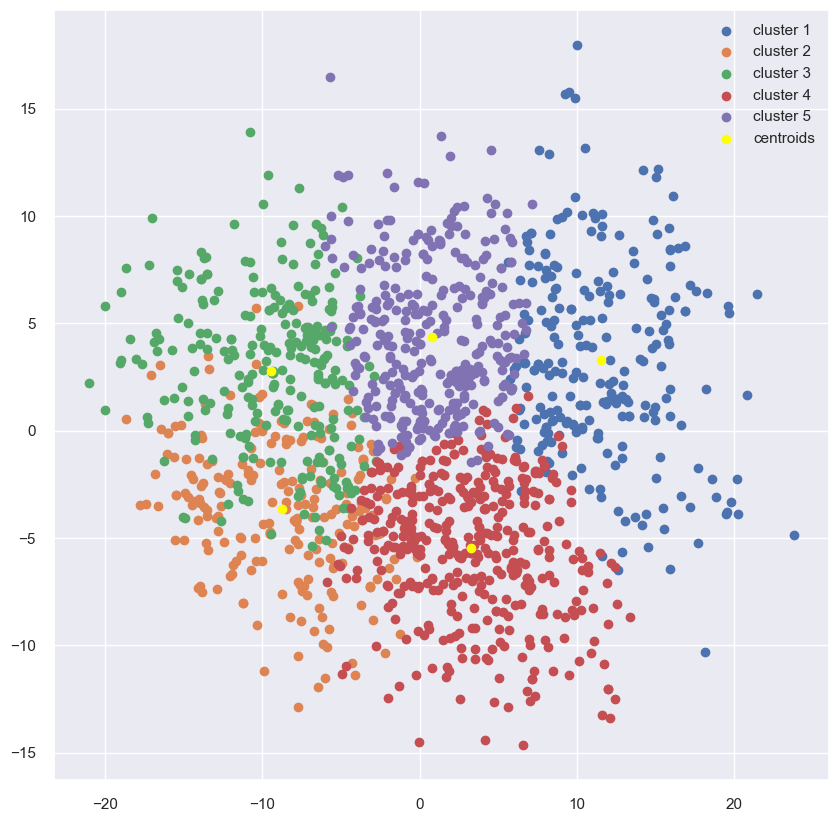

In [88]:
plt.figure(figsize=(10,10))
plt.scatter(pca_15_reduced[y_pred==0, 0], pca_15_reduced[y_pred==0, 1], label='cluster 1')
plt.scatter(pca_15_reduced[y_pred==1, 0], pca_15_reduced[y_pred==1, 1], label='cluster 2')
plt.scatter(pca_15_reduced[y_pred==2, 0], pca_15_reduced[y_pred==2, 1], label='cluster 3')
plt.scatter(pca_15_reduced[y_pred==3, 0], pca_15_reduced[y_pred==3, 1], label='cluster 4')
plt.scatter(pca_15_reduced[y_pred==4, 0], pca_15_reduced[y_pred==4, 1], label='cluster 5')
plt.scatter(kmean_pca_15.cluster_centers_[:,0], kmean_pca_15.cluster_centers_[:,1], c='yellow', label='centroids')
plt.legend()

**n_components=30**

Text(0.5, 1.0, 'Compressed image with 30 components')

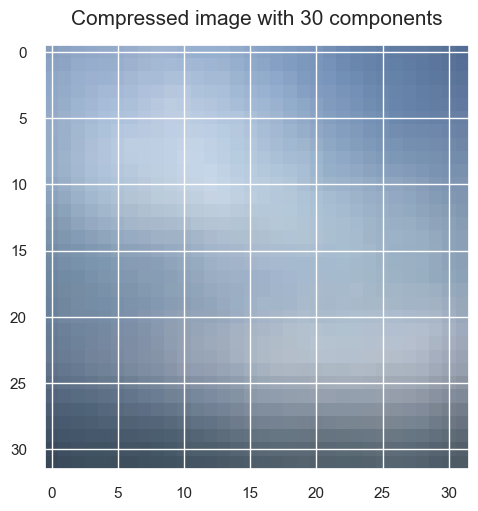

In [89]:
pca_30 = PCA(n_components=30)
pca_30_reduced = pca_30.fit_transform(x_new)
pca_30_recovered = pca_30.inverse_transform(pca_30_reduced)

image_pca_30 = pca_10_recovered[1].reshape([32, 32, 3])
plt.imshow(image_pca_30)
plt.title('Compressed image with 30 components', fontsize=15, pad=15)

In [90]:
kmean_pca_30 = KMeans(n_clusters=5)
kmean_pca_30.fit(pca_30_reduced)
y_pred = kmean_pca_30.predict(pca_30_reduced)

print("Actual Result -", y_new)
print("Predicted Result -", kmean_pca_30.predict(pca_30_reduced))
print("Accuracy -", accuracy_score(kmean_pca_30.predict(pca_30_reduced), y_new))

Actual Result - [0 0 0 ... 4 4 4]
Predicted Result - [1 0 1 ... 4 4 4]
Accuracy - 0.3873333333333333


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


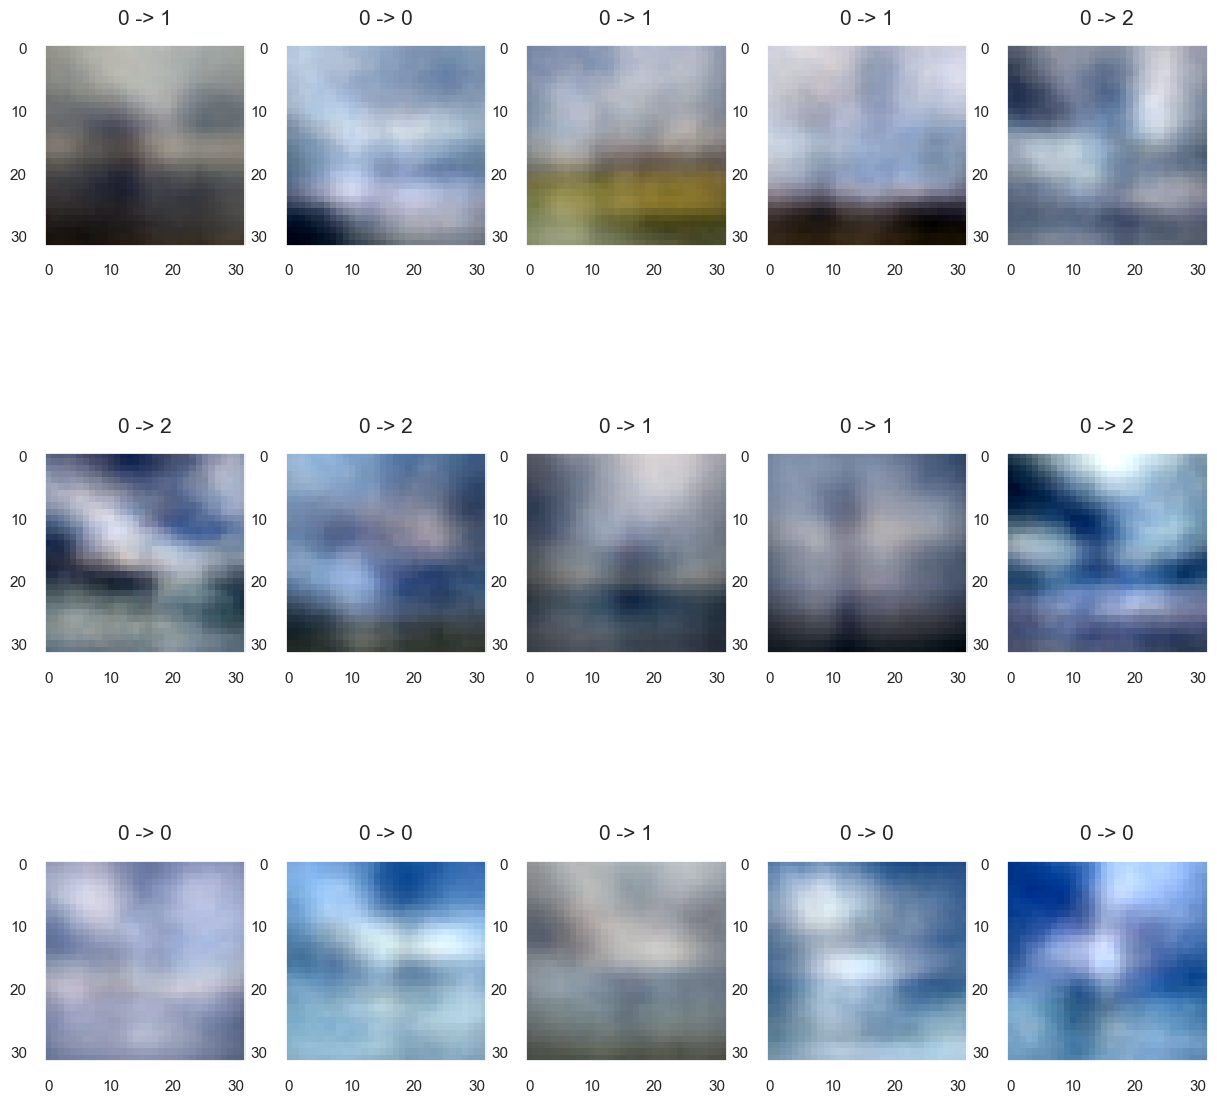

In [91]:
plt.figure(figsize=(15, 15))
pred = kmean_pca_30.predict(pca_30_reduced)
for i in range(15):
    plt.subplot(3, 5, i+1)
    image_pca_5 = pca_30_recovered[i].reshape([32, 32, 3])
    plt.imshow(image_pca_5)
    plt.title(f'{y_new[i]} -> {pred[i]}', fontsize=15, pad=15)
    plt.grid(False)

Silhouetter Score with 30 components: 0.155


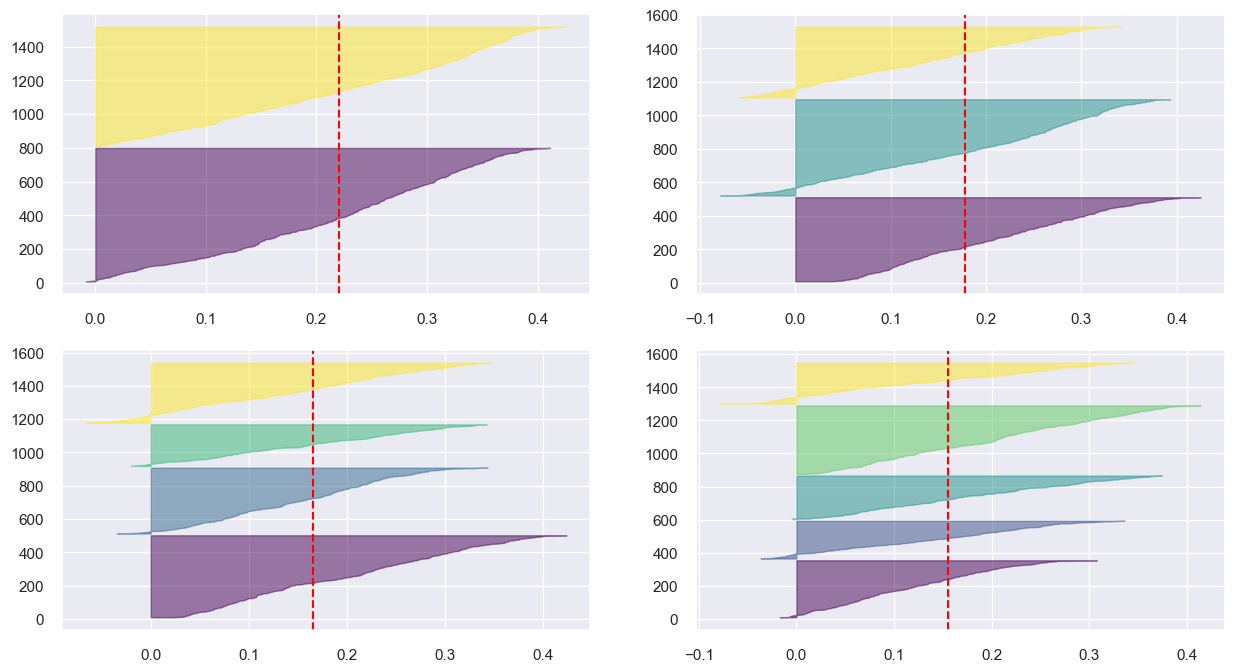

In [92]:
score = silhouette_score(pca_30_reduced, kmean_pca_30.labels_, metric='euclidean')
print('Silhouetter Score with 30 components: %.3f' % score)
visual_silhoutte(pca_30_reduced)

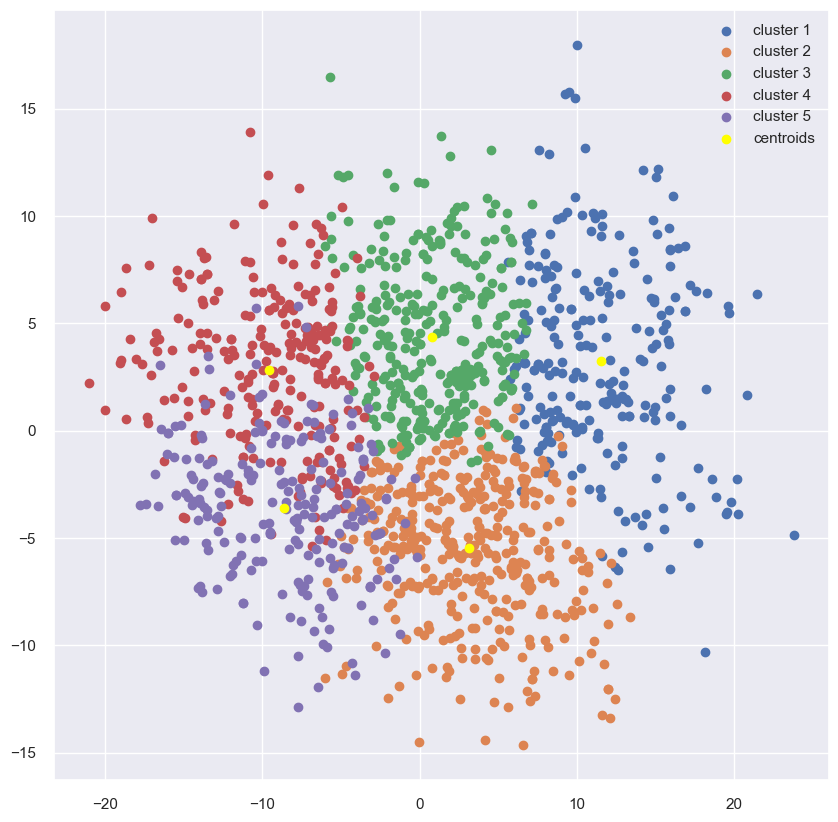

In [93]:
plt.figure(figsize=(10,10))
plt.scatter(pca_30_reduced[y_pred==0, 0], pca_30_reduced[y_pred==0, 1], label='cluster 1')
plt.scatter(pca_30_reduced[y_pred==1, 0], pca_30_reduced[y_pred==1, 1], label='cluster 2')
plt.scatter(pca_30_reduced[y_pred==2, 0], pca_30_reduced[y_pred==2, 1], label='cluster 3')
plt.scatter(pca_30_reduced[y_pred==3, 0], pca_30_reduced[y_pred==3, 1], label='cluster 4')
plt.scatter(pca_30_reduced[y_pred==4, 0], pca_30_reduced[y_pred==4, 1], label='cluster 5')
plt.scatter(kmean_pca_30.cluster_centers_[:,0], kmean_pca_30.cluster_centers_[:,1], c='yellow', label='centroids')
plt.legend()

**n_components=50**

Text(0.5, 1.0, 'Compressed image with 50 components')

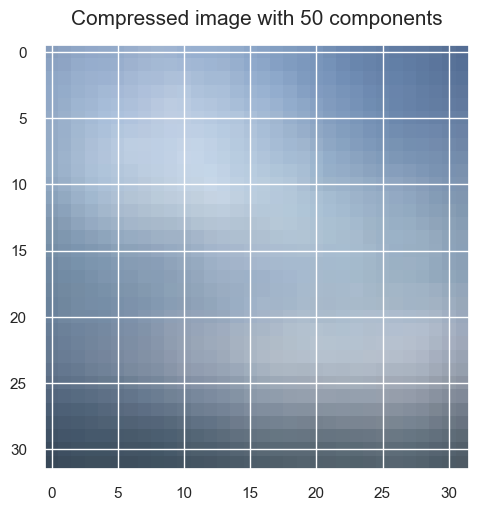

In [94]:
pca_50 = PCA(n_components=50)
pca_50_reduced = pca_50.fit_transform(x_new)
pca_50_recovered = pca_50.inverse_transform(pca_50_reduced)

image_pca_50 = pca_10_recovered[1].reshape([32, 32, 3])
plt.imshow(image_pca_50)
plt.title('Compressed image with 50 components', fontsize=15, pad=15)

In [95]:
kmean_pca_50 = KMeans(n_clusters=5)
kmean_pca_50.fit(pca_50_reduced)
y_pred = kmean_pca_50.predict(pca_50_reduced)

print("Actual Result -", y_new)
print("Predicted Result -", kmean_pca_50.predict(pca_50_reduced))
print("Accuracy -", accuracy_score(kmean_pca_50.predict(pca_50_reduced), y_new))

Actual Result - [0 0 0 ... 4 4 4]
Predicted Result - [1 4 1 ... 2 2 2]
Accuracy - 0.20266666666666666


Silhouetter Score with 50 components: 0.149


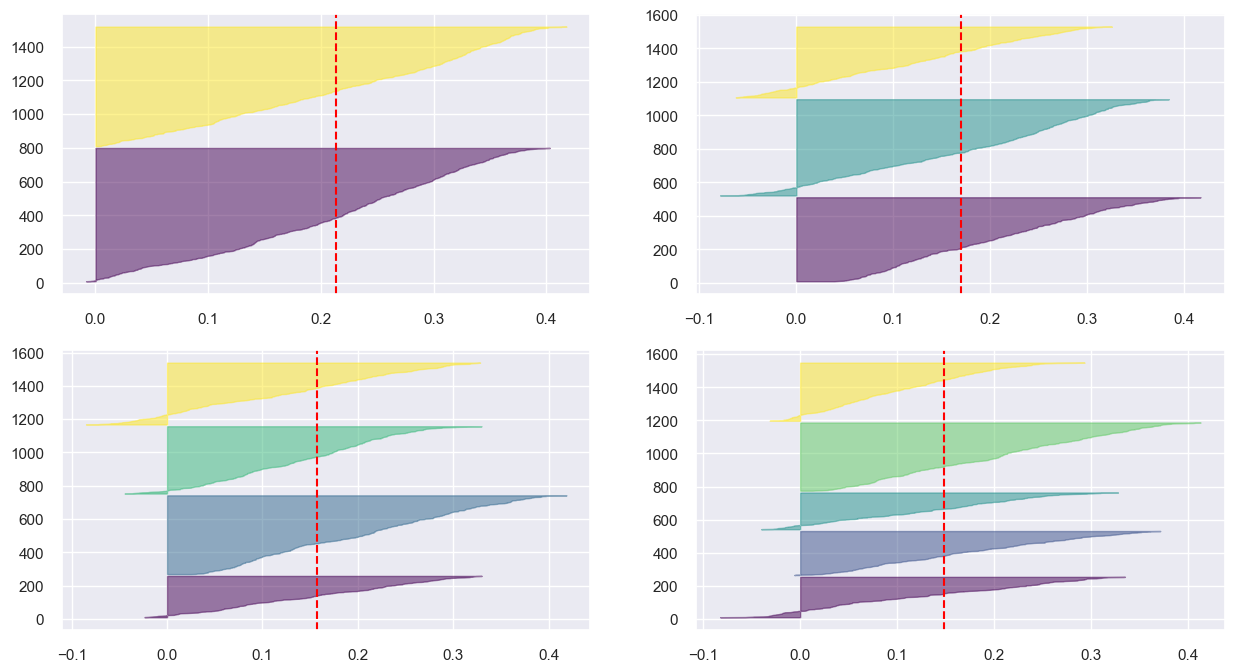

In [96]:
score = silhouette_score(pca_50_reduced, kmean_pca_50.labels_, metric='euclidean')
print('Silhouetter Score with 50 components: %.3f' % score)
visual_silhoutte(pca_50_reduced)

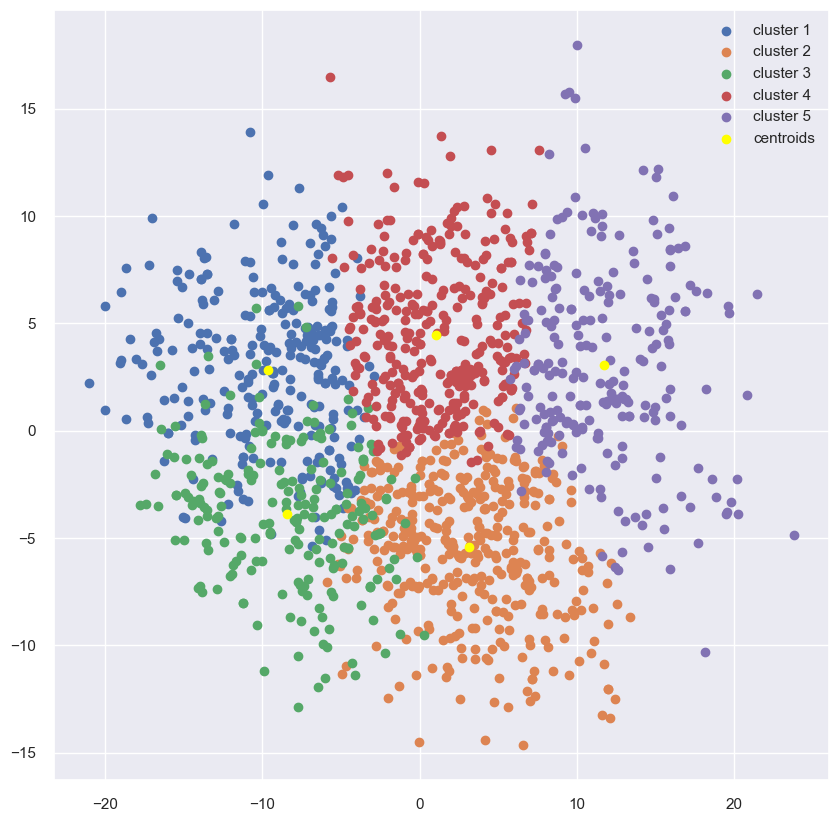

In [97]:
plt.figure(figsize=(10,10))
plt.scatter(pca_50_reduced[y_pred==0, 0], pca_50_reduced[y_pred==0, 1], label='cluster 1')
plt.scatter(pca_50_reduced[y_pred==1, 0], pca_50_reduced[y_pred==1, 1], label='cluster 2')
plt.scatter(pca_50_reduced[y_pred==2, 0], pca_50_reduced[y_pred==2, 1], label='cluster 3')
plt.scatter(pca_50_reduced[y_pred==3, 0], pca_50_reduced[y_pred==3, 1], label='cluster 4')
plt.scatter(pca_50_reduced[y_pred==4, 0], pca_50_reduced[y_pred==4, 1], label='cluster 5')
plt.scatter(kmean_pca_50.cluster_centers_[:,0], kmean_pca_50.cluster_centers_[:,1], c='yellow', label='centroids')
plt.legend()

# With variance and reduced features

In [98]:
variance = 0.98 #The higher the explained variance the more accurate the model will remain
pca = PCA(variance)
pca.fit(x_new)

PCA(n_components=0.98)

In [99]:
Clus_dataSet = pca.transform(x_new)
approximation = pca.inverse_transform(Clus_dataSet)

In [100]:
print("Number of components before PCA  = " + str(x_new.shape[1]))
print("Number of components after PCA 0.98 = " + str(pca.n_components_)) #dimension reduced from 784

Number of components before PCA  = 3072
Number of components after PCA 0.98 = 233


# Gaussian Mixture Model (GMM)

In [101]:
def scale_vector(x):
    mn = x.sum(axis=0).sum(axis=0)/(x.shape[0]*x.shape[1])
    val = mn/np.linalg.norm(mn, ord=None)
    return [val]

In [102]:
data = [scale_vector(x[i]) for i in range(len(y_new))]
data = pd.DataFrame(data, columns=["rgb"])
df = data.rgb.apply(list).apply(pd.Series)
df.columns = ['Red', 'Green', 'Blue']

In [103]:
df

Red     Green      Blue
0     0.577350  0.577350  0.577350
1     0.506169  0.561680  0.654453
2     0.593079  0.593683  0.543873
3     0.546157  0.560938  0.622142
4     0.513856  0.560463  0.649487
...        ...       ...       ...
1495  0.842454  0.490802  0.222228
1496  0.971826  0.234646  0.022268
1497  0.885747  0.454015  0.096550
1498  0.918398  0.383346  0.097934
1499  0.899389  0.412629  0.144347

[1500 rows x 3 columns]

In [104]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df, y_new, test_size=0.2, random_state=42)
print(X_train1.shape) 
print(X_test1.shape)

(1200, 3)
(300, 3)


c:\Users\shiva\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


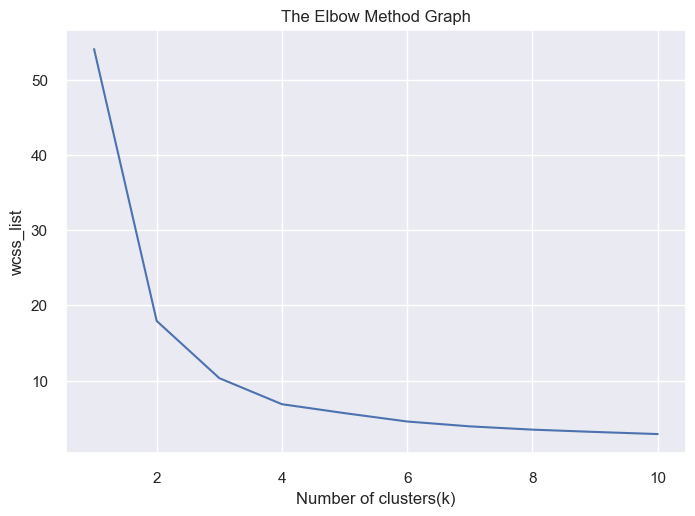

In [105]:
wcss_list = []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 0)  
    kmeans.fit(X_train1)  
    wcss_list.append(kmeans.inertia_)  

plt.plot(range(1, 11), wcss_list)  
plt.title('The Elbow Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()

In [106]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(X_test1.values)  

In [107]:
k_means_labels = kmeans.labels_ #List of labels of each dataset
print("The list of labels of the clusters are " + str(np.unique(k_means_labels)))

The list of labels of the clusters are [0 1 2 3 4]


In [108]:
G = len(np.unique(k_means_labels)) #Number of labels
#2D matrix  for an array of indexes of the given label
cluster_index= [[] for i in range(G)]
for i, label in enumerate(k_means_labels,0):
    for n in range(G):
        if label == n:
            cluster_index[n].append(i)
        else:
            continue        
cluster_index

[[1,
  8,
  23,
  29,
  42,
  53,
  68,
  75,
  78,
  99,
  107,
  111,
  115,
  121,
  126,
  130,
  137,
  140,
  150,
  158,
  160,
  204,
  216,
  218,
  220,
  239,
  280,
  281,
  293,
  297],
 [2,
  3,
  4,
  7,
  10,
  12,
  15,
  17,
  19,
  25,
  26,
  27,
  31,
  33,
  34,
  35,
  36,
  37,
  39,
  45,
  46,
  47,
  48,
  50,
  51,
  52,
  54,
  55,
  56,
  57,
  58,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  69,
  70,
  72,
  73,
  74,
  76,
  77,
  81,
  82,
  83,
  84,
  85,
  86,
  90,
  91,
  92,
  95,
  96,
  97,
  100,
  101,
  104,
  105,
  106,
  108,
  109,
  112,
  113,
  114,
  116,
  117,
  118,
  123,
  124,
  129,
  131,
  132,
  134,
  135,
  136,
  138,
  139,
  141,
  143,
  144,
  149,
  152,
  157,
  159,
  161,
  162,
  164,
  165,
  167,
  169,
  170,
  171,
  172,
  173,
  174,
  175,
  177,
  178,
  180,
  181,
  182,
  185,
  186,
  187,
  188,
  190,
  191,
  197,
  201,
  203,
  206,
  207,
  208,
  210,
  212,
  214,
  215,
  217,
  219,
  224,
 

In [109]:
Y_clust = [[] for i in range(G)]
for n in range(G):
    Y_clust[n] = y_train1[cluster_index[n]] #Y_clust[0] contains array of "correct" category from y_train for the cluster_index[0]
    assert(len(Y_clust[n]) == len(cluster_index[n])) #dimension confirmation


In [110]:
def counter(cluster):
    unique, counts = np.unique(cluster, return_counts=True)
    label_index = dict(zip(unique, counts))
    return label_index


In [111]:
label_count= [[] for i in range(G)]
for n in range(G):
    label_count[n] = counter(Y_clust[n])

for i in range(len(label_count)):
    print("Number of items of certain category in cluster",i+1,"-",label_count[i])
    

Number of items of certain category in cluster 1 - {0: 5, 1: 7, 2: 9, 3: 6, 4: 3}
Number of items of certain category in cluster 2 - {0: 36, 1: 36, 2: 25, 3: 31, 4: 32}
Number of items of certain category in cluster 3 - {0: 4, 1: 3, 2: 6, 3: 3, 4: 3}
Number of items of certain category in cluster 4 - {0: 5, 1: 11, 2: 8, 3: 9, 4: 21}
Number of items of certain category in cluster 5 - {0: 5, 1: 11, 2: 6, 3: 8, 4: 7}


In [112]:
class_names = {0:'Cloudy', 1:'Foggy',2: 'Rainy',3: 'Shine',4: 'Sunrise'} #Dictionary of class names

#A function to plot a bar graph for visualising the number of items of certain category in a cluster
def plotter(label_dict):
    plt.bar(range(len(label_dict)), list(label_dict.values()), align='center')
    a = []
    for i in [*label_dict]: a.append(class_names[i])
    plt.xticks(range(len(label_dict)), list(a), rotation=45, rotation_mode='anchor')


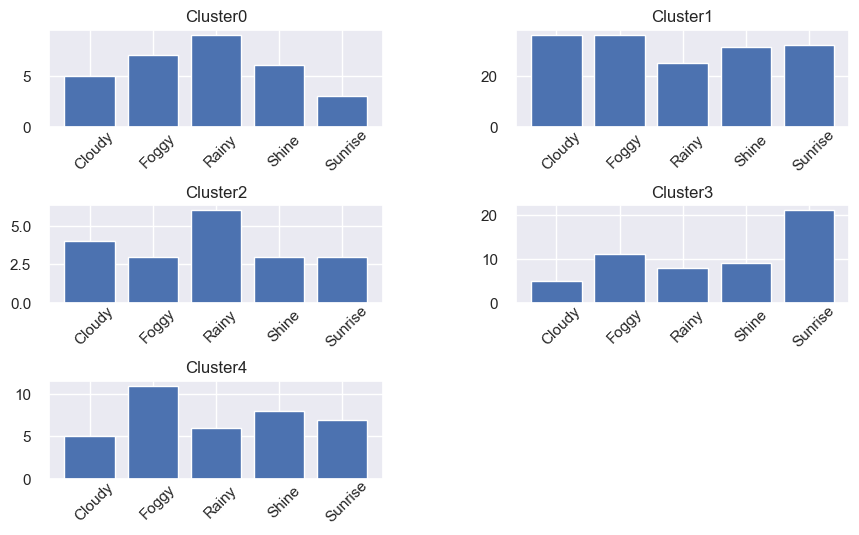

In [113]:
plt.figure(figsize=(10,10))
for i in range (1,6):
    plt.subplot(5, 2, i)
    plotter(label_count[i-1]) 
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.8)

    plt.title("Cluster" + str(i-1))


In [114]:
print("Actual Result -", y_test1)
print("Predicted Result -", y_predict)
# print("Accuracy -", accuracy_score(kmean.predict(tesX_testt_x), test_y))

Actual Result - [3 4 1 1 1 2 3 2 4 0 2 4 2 4 0 4 4 2 1 0 4 3 4 4 4 1 4 4 4 4 3 2 4 3 0 1 1
 1 3 0 4 1 4 2 3 1 1 1 2 3 2 1 3 4 1 2 0 1 1 3 2 1 1 0 2 1 1 3 4 0 1 2 2 0
 2 4 2 1 1 3 3 0 0 2 2 0 2 3 2 3 3 0 0 4 3 1 1 0 4 1 3 2 3 3 1 0 0 4 0 2 1
 4 2 0 0 1 2 0 0 3 3 4 4 1 0 4 4 2 4 1 4 0 3 4 1 0 1 1 3 0 4 0 4 0 1 4 2 3
 1 2 4 4 3 4 1 4 4 0 1 0 1 1 3 4 0 0 4 3 3 1 0 3 1 2 0 0 3 2 1 4 0 1 0 0 4
 2 3 1 3 4 1 2 4 4 3 0 3 0 2 1 3 2 1 1 4 3 0 2 1 2 0 4 2 4 0 1 4 1 4 0 4 3
 2 1 0 1 0 0 4 4 3 1 2 3 3 3 4 4 4 4 2 3 2 0 1 1 4 4 4 2 3 0 4 2 3 3 1 1 3
 4 3 0 1 3 4 4 1 0 3 2 1 0 1 4 2 4 4 4 1 4 4 4 4 2 0 2 0 4 0 4 1 4 0 4 2 3
 2 4 4 2]
Predicted Result - [3 0 1 1 1 3 3 1 0 3 1 4 1 2 3 1 4 1 3 1 4 3 2 0 4 1 1 1 4 0 3 1 4 1 1 1 1
 1 3 1 2 3 0 3 3 1 1 1 1 3 1 1 1 0 1 1 1 1 1 3 4 1 1 1 1 1 1 1 0 1 1 3 1 1
 1 0 1 1 0 3 3 1 1 1 1 1 1 3 4 3 1 1 1 4 3 1 1 1 3 0 1 1 3 3 1 1 1 0 1 1 4
 0 1 1 1 0 1 1 1 3 3 0 2 1 1 4 0 3 2 1 0 1 1 4 1 1 1 0 1 1 0 1 2 1 1 4 3 3
 3 1 0 4 1 2 4 2 3 1 0 1 0 1 1 2 1 1 4 1 3 1 1 1 1 1 1 

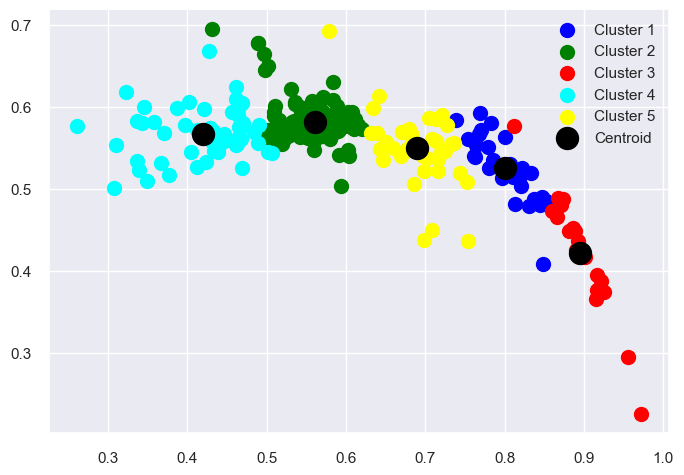

In [115]:
plt.scatter(X_test1.values[y_predict == 0, 0], X_test1.values[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(X_test1.values[y_predict == 1, 0], X_test1.values[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(X_test1.values[y_predict == 2, 0], X_test1.values[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(X_test1.values[y_predict == 3, 0], X_test1.values[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster 
plt.scatter(X_test1.values[y_predict == 4, 0], X_test1.values[y_predict == 4, 1], s = 100, c = 'yellow', label = 'Cluster 5') #for fourth cluster 

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 250, c = 'black', label = 'Centroid') 
plt.grid(True)
plt.legend() 
plt.show()

In [116]:
from scipy.spatial.distance import cdist

In [117]:
def plot_kmeans(kmeans, X, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)
    plt.figure()
    ax = plt.gca()
    ax.axis('equal')
    ax.scatter(X[labels == 0, 0], X[labels == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
    ax.scatter(X[labels == 1, 0], X[labels == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
    ax.scatter(X[labels == 2, 0], X[labels == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
    ax.scatter(X[labels == 3, 0], X[labels == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster 
    ax.scatter(X[labels == 4, 0], X[labels == 4, 1], s = 100, c = 'yellow', label = 'Cluster 5') #for fifth cluster 
    ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],c = 'black' , s = 100 , cmap='viridis', zorder=2) 
    ax.grid(True)
    
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels==i], [center]).max() for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c,r, fc='#CCCCCC',lw=3, alpha=0.5, zorder=1))

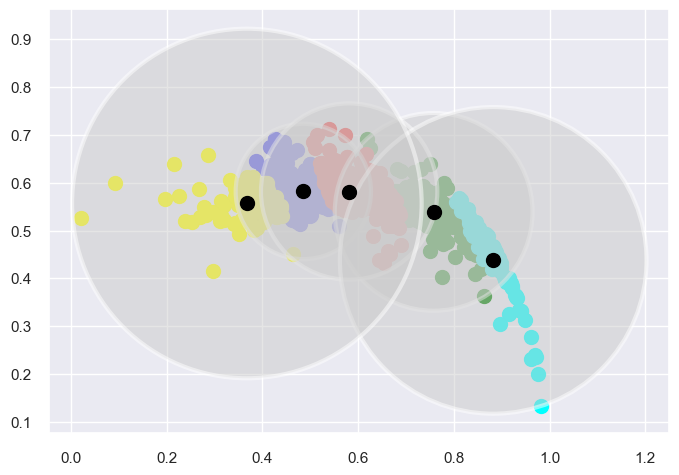

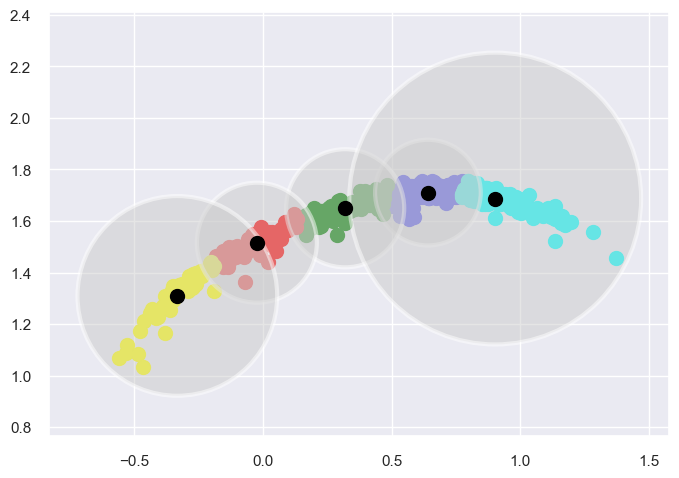

In [118]:
rng = np.random.RandomState(13)

plot_kmeans(KMeans(n_clusters=5, random_state=42), X_train1.values)
plot_kmeans(KMeans(n_clusters=5, random_state=42), np.dot(X_train1.values, rng.randn(3, 3)))

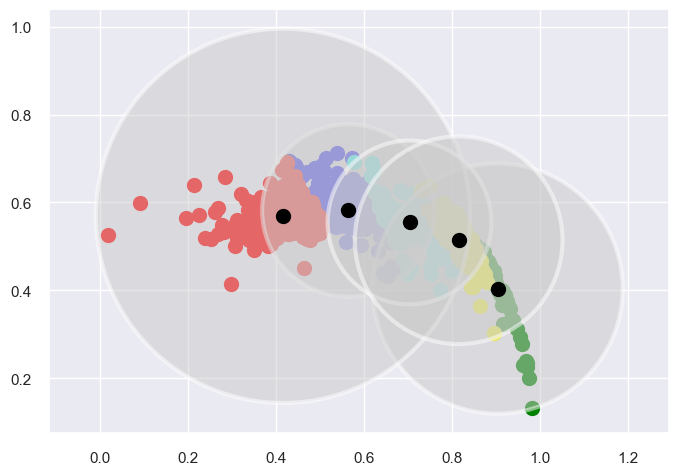

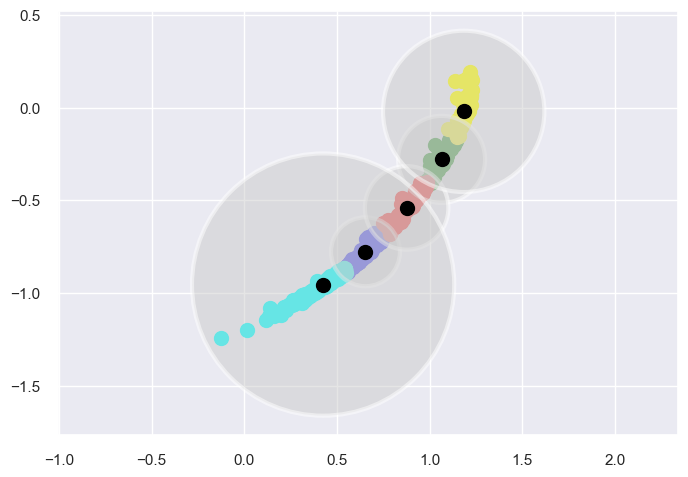

In [119]:
rng = np.random.RandomState(13)
X_stretched = np.dot(df.values, rng.randn(3, 3))

plot_kmeans(KMeans(n_clusters=5, random_state=42), df.values)
plot_kmeans(KMeans(n_clusters=5, random_state=42), np.dot(X_stretched, rng.randn(3, 3)))

In [120]:
from sklearn import mixture

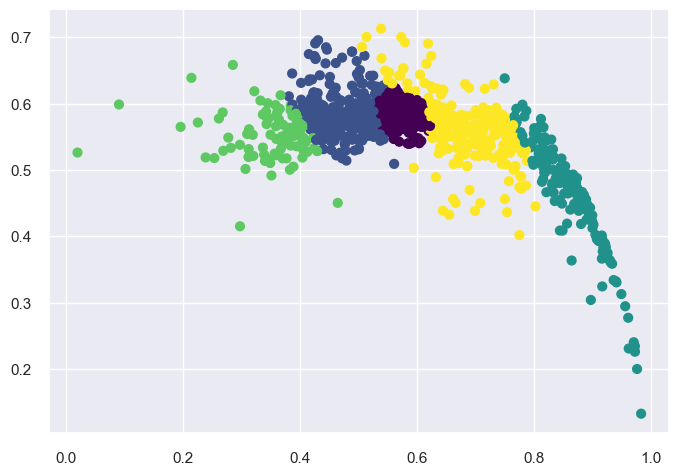

In [121]:
gmm = mixture.GaussianMixture(n_components=5, covariance_type='full').fit(df)
labels = gmm.predict(df)
plt.scatter(df.values[:, 0], df.values[:, 1], c=labels, s=40, cmap='viridis') 
plt.grid(True)

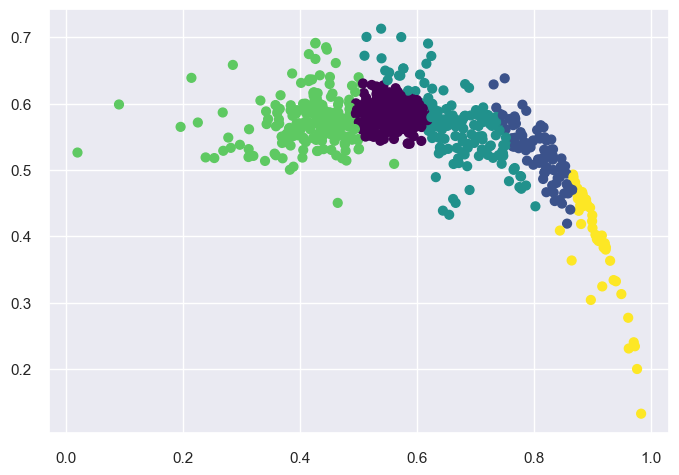

In [122]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df.values, y, test_size=0.3, random_state=42)

gmm = mixture.GaussianMixture(n_components=5, covariance_type='full').fit(X_train2)
labels = gmm.predict(X_train2)
plt.scatter(X_train2[:, 0], X_train2[:, 1], c=labels, s=40, cmap='viridis') 
plt.grid(True)

In [123]:
probs = gmm.predict_proba(df)
print(probs[:1500].round(2))

[[1.   0.   0.   0.   0.  ]
 [0.79 0.   0.   0.21 0.  ]
 [0.98 0.   0.02 0.   0.  ]
 ...
 [0.   0.   0.   0.   1.  ]
 [0.   0.   0.   0.   1.  ]
 [0.   0.   0.   0.   1.  ]]


c:\Users\shiva\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianMixture was fitted without feature names
  warnings.warn(


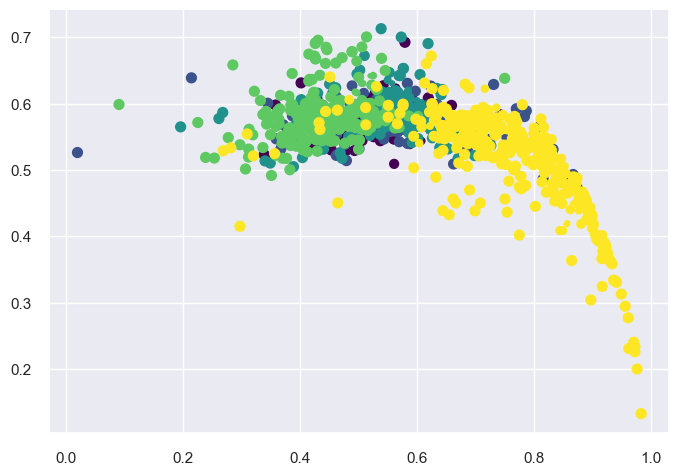

In [124]:
size = 50*probs.max(1)**2
plt.scatter(df.values[:, 0], df.values[:, 1], c=y_new , s=size, cmap='viridis') 
plt.grid(True)

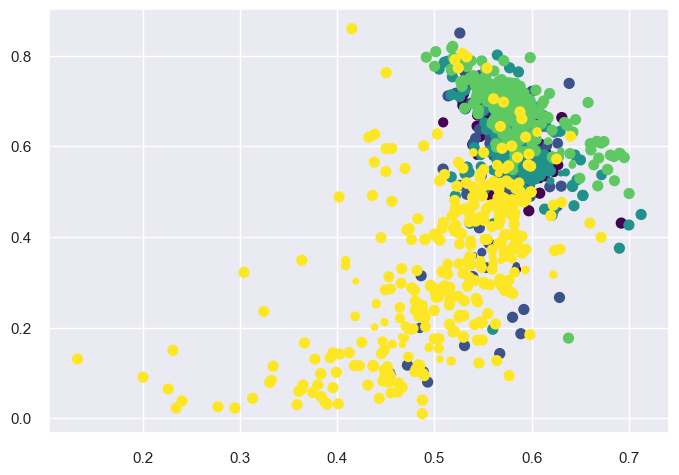

In [125]:
plt.scatter(df.values[:, 1], df.values[:, 2], c=y_new , s=size, cmap='viridis') 

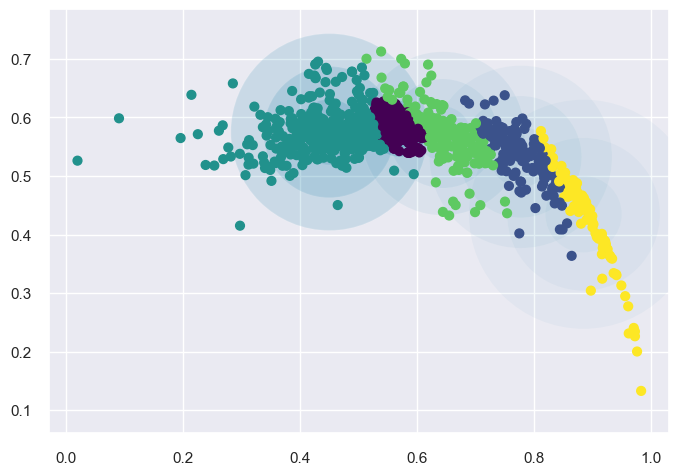

In [126]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = plt.gca()
    if covariance.shape == (2, 2):
        U,s,Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width = 2 * np.sqrt(s)
        height = 2 * np.sqrt(s)
    else: 
        angle = 0
        width = 2 * np.sqrt(covariance)
        height = 2 * np.sqrt(covariance)

        for nsig in range(1, 4):
          ax.add_patch(Ellipse(position, nsig*width, nsig*height, angle, **kwargs))

def plot_gmm(gmm, X, label=True, ax=None):
    ax = plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels , s=40 , cmap='viridis', zorder=2) 
        ax.grid(True)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40 , zorder=2) 
    ax.axis('equal')

    w_factor = 0.2/gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w*w_factor)

plot_gmm(mixture.GaussianMixture(n_components=5, covariance_type='spherical', random_state=42), df.values)

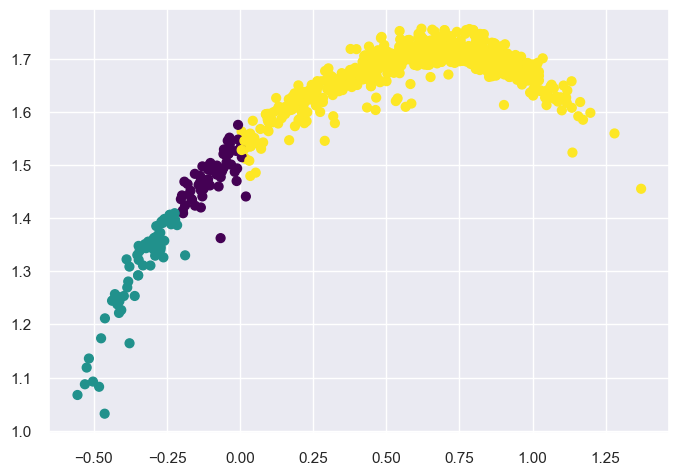

In [127]:
from sklearn import mixture

gmm = mixture.GaussianMixture(n_components=5, covariance_type='full').fit(df.values)
labels = gmm.predict(X_stretched)
plt.scatter(X_stretched[:, 0], X_stretched[:, 1], c=labels , s=40 , cmap='viridis') 
plt.grid(True)

In [128]:
probs = gmm.predict_proba(X_stretched)
print(probs[:20000].round(2))

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]


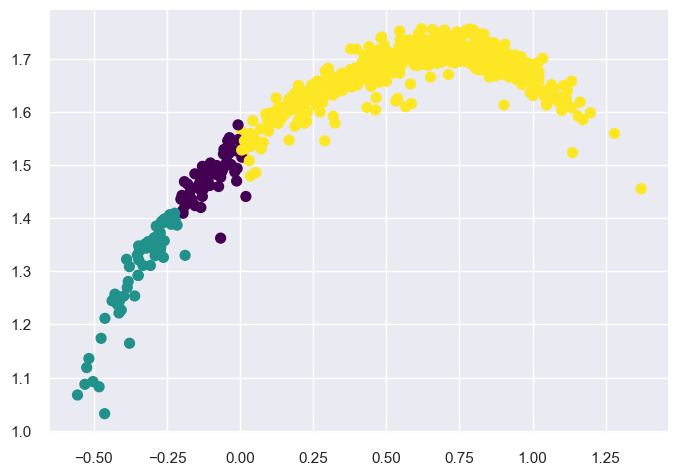

In [129]:
size = 50*probs.max(1)**2
plt.scatter(X_stretched[:, 0], X_stretched[:, 1], c=labels , s=size, cmap='viridis') 
plt.grid(True)

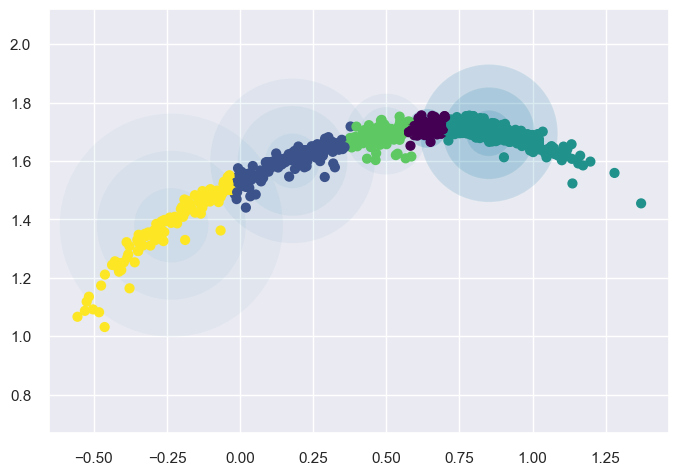

In [130]:
plot_gmm(mixture.GaussianMixture(n_components=5, covariance_type='spherical', random_state=42), X_stretched)

**GMM as Density Estimation**

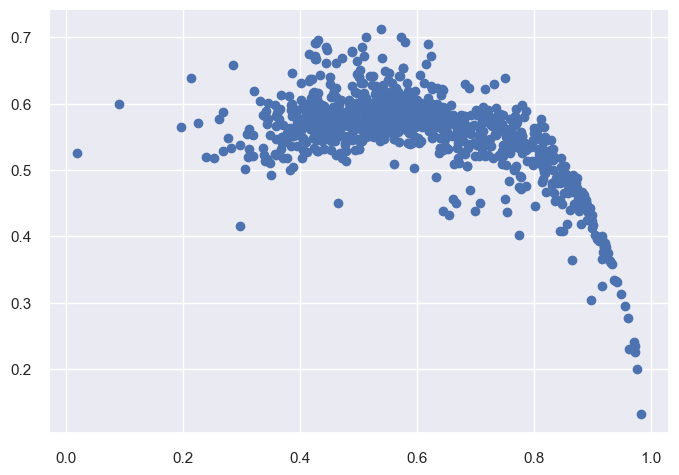

In [131]:
plt.scatter(df.values[:, 0], df.values[:, 1])

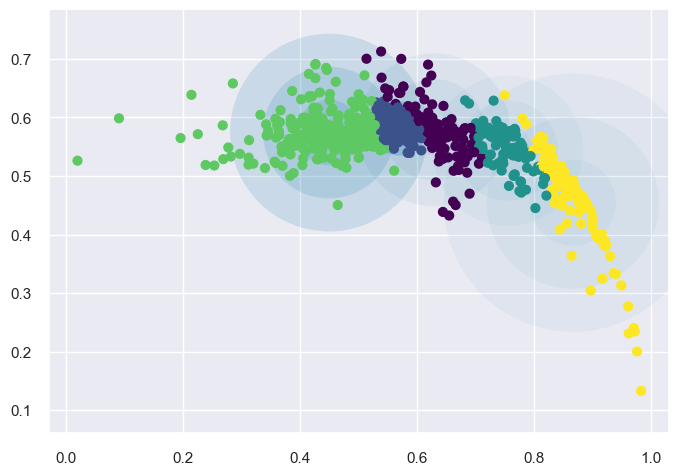

In [132]:
plot_gmm(mixture.GaussianMixture(n_components=5, covariance_type='spherical', random_state=42), X_train2)

c:\Users\shiva\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


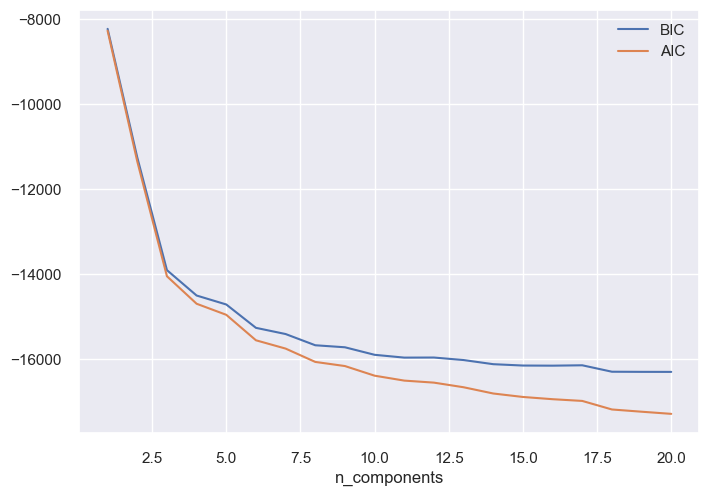

In [133]:
n_components = np.arange(1, 21)
models = [mixture.GaussianMixture(n, covariance_type='full', random_state=42).fit(X_train2)
          for n in n_components]

plt.plot(n_components, [m.bic(X_train2) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X_train2) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

# Accuracy plot

**Prepare Accuracy Data for Test**

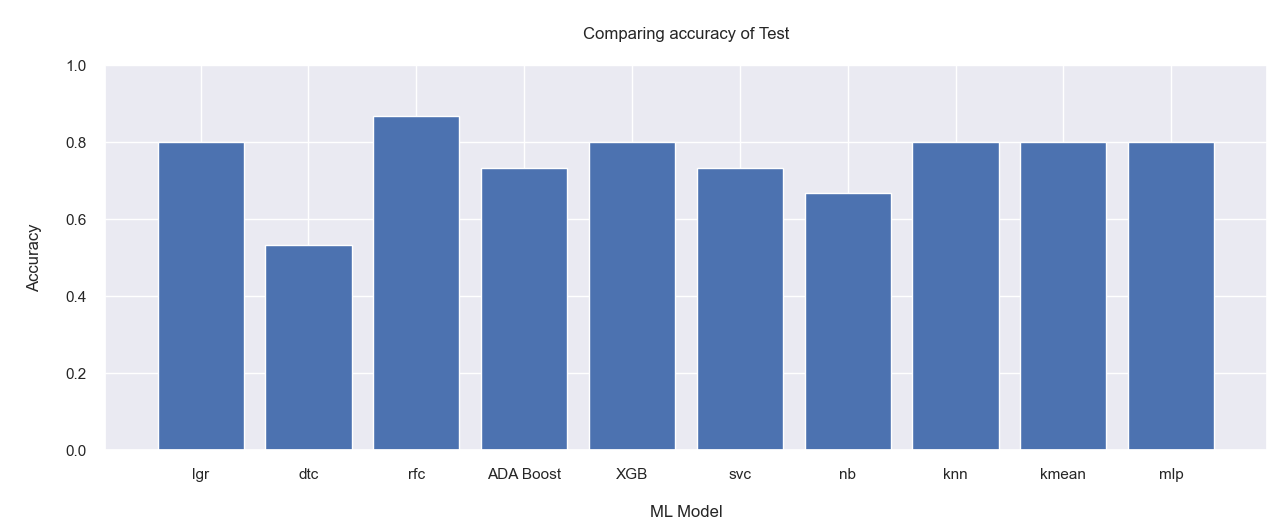

In [134]:
accuracy_test = {
    "lgr": lgr.score(test_x, test_y), 
    "dtc": dtc.score(test_x, test_y), 
    "rfc": rfc.score(test_x, test_y),
    "ADA Boost": ada_boost.score(test_x, test_y),
    "XGB": xbgc.score(test_x, test_y),
    "svc": svc.score(test_x, test_y),
    "nb": nb.score(test_x, test_y),
    "knn": knn.score(test_x, test_y),
    "kmean": accuracy_score(number_labels_test, test_y),
    "mlp": mlp.score(test_x, test_y),
    }
x_axis = list(accuracy_test.keys())
y_axis = list(accuracy_test.values())

plt.figure(figsize = (15, 5))
plt.bar(x_axis, y_axis)
plt.xlabel("\nML Model")
plt.ylabel("\nAccuracy\n")
plt.title("\nComparing accuracy of Test\n")
plt.ylim(0, 1)
plt.show()

**Prepare Accuracy Data for Train**

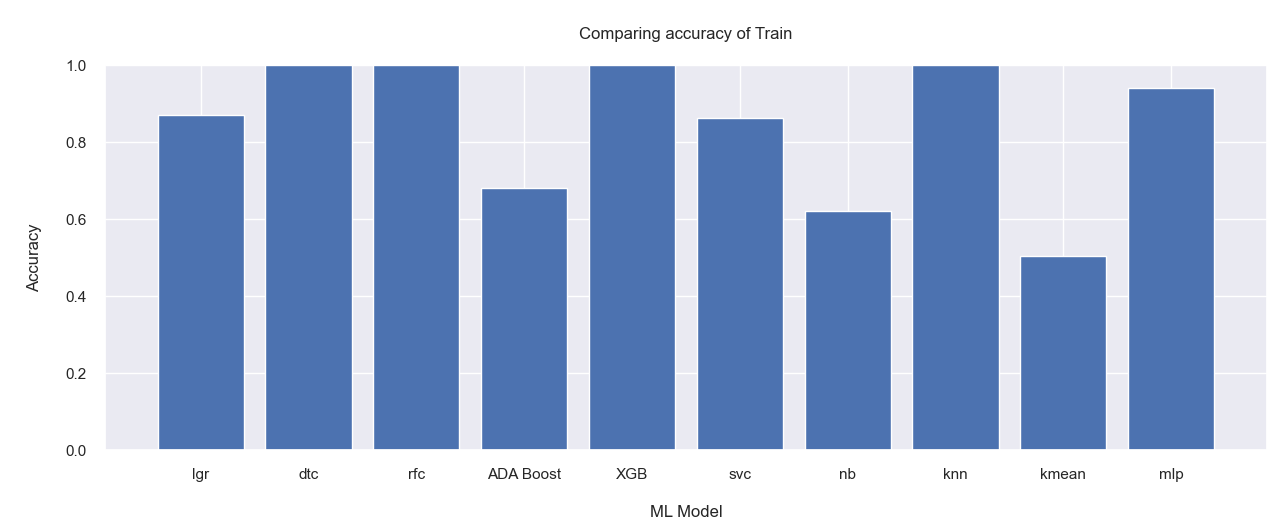

In [135]:
accuracy_train = {
    "lgr": lgr.score(train_x, train_y), 
    "dtc": dtc.score(train_x, train_y), 
    "rfc": rfc.score(train_x, train_y),
    "ADA Boost": ada_boost.score(train_x, train_y),
    "XGB": xbgc.score(train_x, train_y),
    "svc": svc.score(train_x, train_y),
    "nb": nb.score(train_x, train_y),
    "knn": knn.score(train_x, train_y),
    "kmean": accuracy_score(number_labels_train, train_y),
    "mlp": mlp.score(train_x, train_y),
    }
x_axis = list(accuracy_train.keys())
y_axis = list(accuracy_train.values())

plt.figure(figsize = (15, 5))
plt.bar(x_axis, y_axis)
plt.xlabel("\nML Model")
plt.ylabel("\nAccuracy\n")
plt.title("\nComparing accuracy of Train\n")
plt.ylim(0, 1)
plt.show()